In [1]:
import pandas as pd
import modeling as md
import split

%load_ext autoreload

%autoreload 2


In [120]:
df = pd.read_csv('final_data.csv')

In [3]:
df.head()

repo language  \
0              pyca/cryptography   Python   
1  sobolevn/awesome-cryptography      NaN   
2                randombit/botan      C++   
3                  golang/crypto       Go   
4              pycrypto/pycrypto   Python   

                                     readme_contents  \
0  pyca/cryptography\n=================\n\n.. ima...   
1  # Awesome Cryptography [![Awesome](https://cdn...   
2  Botan: Crypto and TLS for Modern C++\n========...   
3  # Go Cryptography\n\n[![Go Reference](https://...   
4  | ⚠️ WARNING                                  ...   

                                             cleaned  \
0  pyca cryptography\n                 \n\n   ima...   
1    awesome cryptography    awesome  https   cdn...   
2  botan  crypto and tls for modern c  \n        ...   
3    go cryptography\n\n   go reference  https   ...   
4     warning                                    ...   

                                  without_stop_words  \
0  pyca cryptography image https img shields io p...   
1  awesome cryptography awesome https cdn rawgit ...   
2  botan crypto tls modern c botan japanese peony...   
3  go cryptography go reference https pkg go dev ...   
4  warning pycrypto 2 x unmaintained obsolete con...   

                                           tokenized  \
0  pyca cryptography image https img shields io p...   
1  awesome cryptography awesome https cdn rawgit ...   
2  botan crypto tls modern c botan japanese peony...   
3  go cryptography go reference https pkg go dev ...   
4  warning pycrypto 2 x unmaintained obsolete con...   

                                                stem  \
0  pyca cryptographi imag http img shield io pypi...   
1  awesom cryptographi awesom http cdn rawgit com...   
2  botan crypto tl modern c botan japanes peoni f...   
3  go cryptographi go refer http pkg go dev badg ...   
4  warn pycrypto 2 x unmaintain obsolet contain s...   

                                                lemm  
0  pyca cryptography image http img shield io pyp...  
1  awesome cryptography awesome http cdn rawgit c...  
2  botan crypto tl modern c botan japanese peony ...  
3  go cryptography go reference http pkg go dev b...  
4  warning pycrypto 2 x unmaintained obsolete con...

In [4]:
df = df.dropna()

In [5]:
df.head()

repo language  \
0  pyca/cryptography   Python   
2    randombit/botan      C++   
3      golang/crypto       Go   
4  pycrypto/pycrypto   Python   
5  weidai11/cryptopp      C++   

                                     readme_contents  \
0  pyca/cryptography\n=================\n\n.. ima...   
2  Botan: Crypto and TLS for Modern C++\n========...   
3  # Go Cryptography\n\n[![Go Reference](https://...   
4  | ⚠️ WARNING                                  ...   
5  Crypto++: free C++ Class Library of Cryptograp...   

                                             cleaned  \
0  pyca cryptography\n                 \n\n   ima...   
2  botan  crypto and tls for modern c  \n        ...   
3    go cryptography\n\n   go reference  https   ...   
4     warning                                    ...   
5  crypto    free c   class library of cryptograp...   

                                  without_stop_words  \
0  pyca cryptography image https img shields io p...   
2  botan crypto tls modern c botan japanese peony...   
3  go cryptography go reference https pkg go dev ...   
4  warning pycrypto 2 x unmaintained obsolete con...   
5  crypto free c class library cryptographic sche...   

                                           tokenized  \
0  pyca cryptography image https img shields io p...   
2  botan crypto tls modern c botan japanese peony...   
3  go cryptography go reference https pkg go dev ...   
4  warning pycrypto 2 x unmaintained obsolete con...   
5  crypto free c class library cryptographic sche...   

                                                stem  \
0  pyca cryptographi imag http img shield io pypi...   
2  botan crypto tl modern c botan japanes peoni f...   
3  go cryptographi go refer http pkg go dev badg ...   
4  warn pycrypto 2 x unmaintain obsolet contain s...   
5  crypto free c class librari cryptograph scheme...   

                                                lemm  
0  pyca cryptography image http img shield io pyp...  
2  botan crypto tl modern c botan japanese peony ...  
3  go cryptography go reference http pkg go dev b...  
4  warning pycrypto 2 x unmaintained obsolete con...  
5  crypto free c class library cryptographic sche...

In [6]:
python = df[df.language=='Python']

In [7]:
lang_dict = {}
languages = df.language.unique()
for lang in languages:
    lang_dict[lang] = df[df.language==lang]
    
for key, val in lang_dict.items():
    print(f'key: {key}, val: {val}')

key: Python, val:                                    repo language  \
0                     pyca/cryptography   Python   
4                     pycrypto/pycrypto   Python   
11       TomLous/coursera-cryptography1   Python   
16                       crypto101/book   Python   
20   georgemarshall/django-cryptography   Python   
..                                  ...      ...   
419                ipt-labs/crypto-FB-9   Python   
424                   JHUISI/auto-tools   Python   
426                 Carleslc/CryptTools   Python   
428           tf-encrypted/tf-encrypted   Python   
429                 jbdrvl/cryptography   Python   

                                       readme_contents  \
0    pyca/cryptography\n=================\n\n.. ima...   
4    | ⚠️ WARNING                                  ...   
11   coursera-cryptography1\n======================...   
16   ======================\n Crypto 101: the book\...   
20   Django Cryptography\n===================\n\nA ...   
..       

In [8]:
one_string_per_language = {}
for lang in languages:
    one_string_per_language[lang] = ""
    for val in list(lang_dict[lang].lemm.values):
        one_string_per_language[lang] += val


for key in one_string_per_language.keys():
    one_string_per_language[key] = one_string_per_language[key].split(' ')

print(one_string_per_language)

{'Python': ['pyca', 'cryptography', 'image', 'http', 'img', 'shield', 'io', 'pypi', 'v', 'cryptography', 'svg', 'target', 'http', 'pypi', 'org', 'project', 'cryptography', 'alt', 'latest', 'version', 'image', 'http', 'readthedocs', 'org', 'project', 'cryptography', 'badge', 'version', 'latest', 'target', 'http', 'cryptography', 'io', 'alt', 'latest', 'doc', 'image', 'http', 'github', 'com', 'pyca', 'cryptography', 'workflow', 'ci', 'badge', 'svg', 'branch', 'main', 'target', 'http', 'github', 'com', 'pyca', 'cryptography', 'action', 'query', 'workflow', '3aci', 'branch', '3amain', 'cryptography', 'package', 'provides', 'cryptographic', 'recipe', 'primitive', 'python', 'developer', 'goal', 'cryptographic', 'standard', 'library', 'support', 'python', '3', '6', 'pypy3', '7', '2', 'cryptography', 'includes', 'high', 'level', 'recipe', 'low', 'level', 'interface', 'common', 'cryptographic', 'algorithm', 'symmetric', 'cipher', 'message', 'digest', 'key', 'derivation', 'function', 'example', 

In [9]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "language")

n   percent
Python            73  0.179361
C                 61  0.149877
JavaScript        51  0.125307
Rust              48  0.117936
C++               36  0.088452
Go                24  0.058968
Java              21  0.051597
C#                20  0.049140
HTML              15  0.036855
PHP               12  0.029484
TeX               10  0.024570
Swift              9  0.022113
TypeScript         8  0.019656
Jupyter Notebook   7  0.017199
Haskell            6  0.014742
Assembly           6  0.014742

In [10]:
import pandas as pd
import numpy as np

list_of_word_counts = []
all_strings = ''

for key in one_string_per_language.keys():
    list_of_word_counts.append(pd.Series(one_string_per_language[key], name=key).value_counts())
    for val in one_string_per_language[key]:
        all_strings += f' {val}'

all_strings = pd.Series(all_strings.split(' '), name='all_words').value_counts()
list_of_word_counts.append(all_strings)
languages = np.append(languages, 'all_words')

freq_df = (pd.concat(list_of_word_counts, axis=1, sort=True)
            .set_axis(languages, axis=1, inplace=False)
            .fillna(0)
            .apply(lambda s: s.astype(int)))
        
freq_df.head()

Python  C++  Go   C  Haskell  JavaScript  \
                                         0    0   0   0        0           0   
'                                       60    9  10  50        0          50   
''                                       1    2   0   0        0           7   
'0'                                      0    1   0   0        0           0   
'000102030405060708090a0b0c0d0e0f'       0    0   0   0        0           2   

                                    TeX  Rust  TypeScript  Java  Swift  PHP  \
                                      0     0           0     0      0    0   
'                                     1     1           1     4      2    9   
''                                    0     0           0     0      0    0   
'0'                                   0     0           0     0      0    0   
'000102030405060708090a0b0c0d0e0f'    0     0           0     0      0    0   

                                    C#  HTML  Jupyter Notebook  Assembly  \
                                     0     0                 0         0   
'                                    0     0                10         1   
''                                   0     0                 0         0   
'0'                                  0     0                 0         0   
'000102030405060708090a0b0c0d0e0f'   0     0                 0         0   

                                    all_words  
                                            1  
'                                         208  
''                                         10  
'0'                                         1  
'000102030405060708090a0b0c0d0e0f'          2

In [11]:
freq_df

Python  C++  Go   C  Haskell  JavaScript  \
                                         0    0   0   0        0           0   
'                                       60    9  10  50        0          50   
''                                       1    2   0   0        0           7   
'0'                                      0    1   0   0        0           0   
'000102030405060708090a0b0c0d0e0f'       0    0   0   0        0           2   
...                                    ...  ...  ..  ..      ...         ...   
zymbit                                   0    0   0   1        0           0   
zymkey                                   0    0   0   1        0           0   
zypper                                   0    2   0   0        0           0   
zz                                       0    5   0   0        0           0   
zz59mmox75d                              0    0   0   0        0           0   

                                    TeX  Rust  TypeScript  Java  Swift  PHP  \
                                      0     0           0     0      0    0   
'                                     1     1           1     4      2    9   
''                                    0     0           0     0      0    0   
'0'                                   0     0           0     0      0    0   
'000102030405060708090a0b0c0d0e0f'    0     0           0     0      0    0   
...                                 ...   ...         ...   ...    ...  ...   
zymbit                                0     0           0     0      0    0   
zymkey                                0     0           0     0      0    0   
zypper                                0     0           0     0      0    0   
zz                                    0     0           0     0      0    0   
zz59mmox75d                           0     0           0     0      0    1   

                                    C#  HTML  Jupyter Notebook  Assembly  \
                                     0     0                 0         0   
'                                    0     0                10         1   
''                                   0     0                 0         0   
'0'                                  0     0                 0         0   
'000102030405060708090a0b0c0d0e0f'   0     0                 0         0   
...                                 ..   ...               ...       ...   
zymbit                               0     0                 0         0   
zymkey                               0     0                 0         0   
zypper                               0     0                 0         0   
zz                                   0     0                 0         0   
zz59mmox75d                          0     0                 0         0   

                                    all_words  
                                            1  
'                                         208  
''                                         10  
'0'                                         1  
'000102030405060708090a0b0c0d0e0f'          2  
...                                       ...  
zymbit                                      1  
zymkey                                      1  
zypper                                      2  
zz                                          5  
zz59mmox75d                                 1  

[21496 rows x 17 columns]

In [12]:
freq_df.sort_values(by='all_words', ascending=False).head(10)


Python  C++   Go    C  Haskell  JavaScript  TeX  Rust  TypeScript  \
http       926  723  504  731       73         623   62   843          94   
com        607  502  429  422       42         299   32   242          56   
key        649  202  135  665        1         284    4   149          17   
github     444  411  254  250       42         237   29   237          27   
0          430  236  266  186       12          81   15   162          10   
1          307  193  127  246        4         124   13   227          16   
org        162  176  182  203       21         201   20   155          23   
use        156  213   55  250       12         102   15   190          19   
build      177  379   38  227       18          56    3   142           9   
2          218  136   73  174       12          61    8   267           9   

        Java  Swift  PHP   C#  HTML  Jupyter Notebook  Assembly  all_words  
http     273    216  129  278   571               109       117       6272  
com      198    126   66  151    88                67        80       3407  
key      140    173   66   77   336                33        19       2950  
github   123     94   44   89    95                39        75       2490  
0         48     33   64   59    32                24        26       1684  
1         64     35   42   44    82                47        46       1617  
org       67     58   50   51    37                15        23       1444  
use       35     45   52   44    49                32        25       1294  
build     25     18    7   35     8                21        27       1190  
2         54     37   27   21    47                 8        23       1175

In [13]:
our_list = []
for lang in languages:
    print(lang)
    our_list.append((freq_df[freq_df[lang] == 0]).sort_values(by=lang).tail(6))
pd.concat(our_list)

Python
C++
Go
C
Haskell
JavaScript
TeX
Rust
TypeScript
Java
Swift
PHP
C#
HTML
Jupyter Notebook
Assembly
all_words


Python  C++  Go   C  Haskell  JavaScript  TeX  Rust  \
csh                 0    0   0   1        0           0    0     0   
cshake              0    0   0   1        0           0    0     0   
cshake128           0    0   0   1        0           0    0     0   
cshake256           0    0   0   1        0           0    0     0   
cryptocommon        0    0   0   0        0           0    0     2   
...               ...  ...  ..  ..      ...         ...  ...   ...   
cryptomg            0    0   0   0        0           0    0     0   
cryptomator's       0    0   0   0        0           0    0     0   
cryptomator         0    0   0   0        0           0    0     0   
cryptonite          0    0   0  11        0           0    0     0   
zz59mmox75d         0    0   0   0        0           0    0     0   

               TypeScript  Java  Swift  PHP  C#  HTML  Jupyter Notebook  \
csh                     0     0      0    0   0     0                 0   
cshake                  0     0      0    0   0     2                 0   
cshake128               0     0      0    0   0     0                 0   
cshake256               0     0      0    0   0     0                 0   
cryptocommon            0     0      0    0   0     0                 0   
...                   ...   ...    ...  ...  ..   ...               ...   
cryptomg                0     0      0    4   0     0                 0   
cryptomator's           0     2      0    0   0     0                 0   
cryptomator             0    39      0    0   0     0                 0   
cryptonite              0     0      0    0   0     0                 0   
zz59mmox75d             0     0      0    1   0     0                 0   

               Assembly  all_words  
csh                   0          1  
cshake                0          3  
cshake128             0          1  
cshake256             0          1  
cryptocommon          0          2  
...                 ...        ...  
cryptomg              0          4  
cryptomator's         0          2  
cryptomator           0         39  
cryptonite            0         11  
zz59mmox75d           0          1  

[96 rows x 17 columns]

In [14]:
# figure out the percentage of spam vs ham
prob_title = [f'p_{lang}' for lang in languages[:-1]]
for title in prob_title:
    freq_df[title] = freq_df.apply(lambda x: x[title[2:]] / x.all_words, axis=1)

freq_df.plot.barh(stacked=True)

plt.title('Proportion of Spam vs Ham for the 20 most common words')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd2d4040e50> (for post_execute):


KeyboardInterrupt: 

In [15]:
import matplotlib.pyplot as plt

for lang in languages:
    print(lang)
    freq_df[prob_title[:-2]].sort_values(by='all_words').drop(columns='all_words').tail(20).sort_values(f'p_{lang}').plot.barh(stacked=True)
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
    plt.show()



Python


KeyError: 'all_words'

In [16]:
import nltk

languages = df.language.unique()

bigram_dict = {}
trigram_dict = {}

print(languages)
for lang in languages:
    sentence = one_string_per_language[lang]
    bigrams = nltk.ngrams(sentence, 2)
    trigram = nltk.ngrams(sentence, 3)
    bigram_dict[lang] = list(bigrams)
    trigram_dict[lang] = list(trigram)
    
bigram_dict['Python']
python_tri_series = pd.Series(trigram_dict['Python'], name='trigrams')
python_tri_series.value_counts().head(25)

['Python' 'C++' 'Go' 'C' 'Haskell' 'JavaScript' 'TeX' 'Rust' 'TypeScript'
 'Java' 'Swift' 'PHP' 'C#' 'HTML' 'Jupyter Notebook' 'Assembly']


(http, github, com)                    387
(github, com, ashutosh1206)            154
(com, ashutosh1206, crypton)           151
(ul, ul, li)                           108
(li, ul, ul)                           108
(ul, li, x)                            107
(li, x, link)                          106
(link, http, github)                   105
(x, link, http)                         99
(crypton, tree, master)                 77
(ashutosh1206, crypton, tree)           77
(crypton, blob, master)                 73
(ashutosh1206, crypton, blob)           73
(com, conda, forge)                     70
(forge, feedstock, build)               68
(http, dev, azure)                      68
(dev, azure, com)                       68
(azure, com, conda)                     68
(conda, forge, feedstock)               68
(cryptography, blob, master)            64
(rakeshsukla53, cryptography, blob)     61
(com, rakeshsukla53, cryptography)      61
(github, com, rakeshsukla53)            61
(blob, mast

In [17]:
for lang in languages:
    print(pd.Series(trigram_dict[lang], name=lang).value_counts().head(20))

(http, github, com)              387
(github, com, ashutosh1206)      154
(com, ashutosh1206, crypton)     151
(ul, ul, li)                     108
(li, ul, ul)                     108
(ul, li, x)                      107
(li, x, link)                    106
(link, http, github)             105
(x, link, http)                   99
(crypton, tree, master)           77
(ashutosh1206, crypton, tree)     77
(crypton, blob, master)           73
(ashutosh1206, crypton, blob)     73
(com, conda, forge)               70
(forge, feedstock, build)         68
(http, dev, azure)                68
(dev, azure, com)                 68
(azure, com, conda)               68
(conda, forge, feedstock)         68
(cryptography, blob, master)      64
Name: Python, dtype: int64
(http, github, com)                 352
(github, com, blockchaincommons)     56
(github, com, microsoft)             25
(com, blockchaincommons, bc)         24
(github, com, qtumproject)           22
(com, randombit, botan)          

In [18]:
for lang in languages:
    print(pd.Series(bigram_dict[lang], name=lang).value_counts().head(20))

(github, com)              388
(http, github)             387
(blob, master)             194
(ul, li)                   162
(li, ul)                   162
(com, ashutosh1206)        154
(ashutosh1206, crypton)    151
(public, key)              108
(ul, ul)                   108
(li, x)                    107
(link, http)               107
(x, link)                  106
(conda, forge)              99
(tree, master)              92
(elliptic, curve)           92
(http, www)                 85
(tf, encrypted)             85
(crypton, tree)             77
(crypton, blob)             73
(private, key)              71
Name: Python, dtype: int64
(github, com)                364
(http, github)               352
(microsoft, seal)            106
(http, www)                   83
(com, blockchaincommons)      57
(0, 0)                        50
(blob, master)                40
(x86, 64)                     40
(homomorphic, encryption)     34
(mingw, w64)                  32
(unit, test)           

In [19]:
pd.Series(bigram_dict['Python']).value

AttributeError: 'Series' object has no attribute 'value'

In [20]:


bigram_title = [f'bigram_p_{lang}' for lang in languages]
for title in bigram_title:
    freq_df[title] = freq_df.apply(lambda x: x[title[9:]] / x.all_words, axis=1)

In [21]:
cols =[col for col in freq_df.columns if 'bigram' in col]
freq_df[cols]

bigram_p_Python  bigram_p_C++  \
                                           0.000000      0.000000   
'                                          0.288462      0.043269   
''                                         0.100000      0.200000   
'0'                                        0.000000      1.000000   
'000102030405060708090a0b0c0d0e0f'         0.000000      0.000000   
...                                             ...           ...   
zymbit                                     0.000000      0.000000   
zymkey                                     0.000000      0.000000   
zypper                                     0.000000      1.000000   
zz                                         0.000000      1.000000   
zz59mmox75d                                0.000000      0.000000   

                                    bigram_p_Go  bigram_p_C  bigram_p_Haskell  \
                                       0.000000    0.000000               0.0   
'                                      0.048077    0.240385               0.0   
''                                     0.000000    0.000000               0.0   
'0'                                    0.000000    0.000000               0.0   
'000102030405060708090a0b0c0d0e0f'     0.000000    0.000000               0.0   
...                                         ...         ...               ...   
zymbit                                 0.000000    1.000000               0.0   
zymkey                                 0.000000    1.000000               0.0   
zypper                                 0.000000    0.000000               0.0   
zz                                     0.000000    0.000000               0.0   
zz59mmox75d                            0.000000    0.000000               0.0   

                                    bigram_p_JavaScript  bigram_p_TeX  \
                                               0.000000      0.000000   
'                                              0.240385      0.004808   
''                                             0.700000      0.000000   
'0'                                            0.000000      0.000000   
'000102030405060708090a0b0c0d0e0f'             1.000000      0.000000   
...                                                 ...           ...   
zymbit                                         0.000000      0.000000   
zymkey                                         0.000000      0.000000   
zypper                                         0.000000      0.000000   
zz                                             0.000000      0.000000   
zz59mmox75d                                    0.000000      0.000000   

                                    bigram_p_Rust  bigram_p_TypeScript  \
                                         0.000000             0.000000   
'                                        0.004808             0.004808   
''                                       0.000000             0.000000   
'0'                                      0.000000             0.000000   
'000102030405060708090a0b0c0d0e0f'       0.000000             0.000000   
...                                           ...                  ...   
zymbit                                   0.000000             0.000000   
zymkey                                   0.000000             0.000000   
zypper                                   0.000000             0.000000   
zz                                       0.000000             0.000000   
zz59mmox75d                              0.000000             0.000000   

                                    bigram_p_Java  bigram_p_Swift  \
                                         0.000000        0.000000   
'                                        0.019231        0.009615   
''                                       0.000000        0.000000   
'0'                                      0.000000        0.000000   
'000102030405060708090a0b0c0d0e0f'       0.000000        0.000000   
...                                           ...     

In [22]:
list_of_all_bigrams = []
my_bigram_sets = []

for lang in languages:
    list_of_all_bigrams.append(bigram_dict[lang])
list_of_all_bigrams = [bi for bigrams in list_of_all_bigrams for bi in bigrams]

for lang in languages:
    my_bigram_sets.append(bigram_dict[lang])
my_bigram_sets.append(list_of_all_bigrams)

my_bigram_sets = [bi for bigram_set in my_bigram_sets for bi in bigram_set]

#list_of_all_bigrams
pd.Series(my_bigram_sets, name='all_bigrams').value_counts()

final_bigram_list = []
for lang in languages:
    final_bigram_list.append(pd.Series(bigram_dict[lang], name=lang))

final_bigram_list

[0         (pyca, cryptography)
 1        (cryptography, image)
 2                (image, http)
 3                  (http, img)
 4                (img, shield)
                  ...          
 49046         (ceasar, cipher)
 49047     (cipher, elementary)
 49048       (elementary, easy)
 49049              (easy, use)
 49050            (use, cipher)
 Name: Python, Length: 49051, dtype: object,
 0            (botan, crypto)
 1               (crypto, tl)
 2               (tl, modern)
 3                (modern, c)
 4                 (c, botan)
                 ...         
 34701           (2010, open)
 34702       (open, solution)
 34703       (solution, file)
 34704         (file, window)
 34705    (window, directory)
 Name: C++, Length: 34706, dtype: object,
 0              (go, cryptography)
 1              (cryptography, go)
 2                 (go, reference)
 3               (reference, http)
 4                     (http, pkg)
                    ...           
 19712    (recorder, 

In [23]:
final_bigram_list
bigrams_value_counts = []
for series in final_bigram_list:
    bigrams_value_counts.append(series.value_counts())
    
bigrams_value_counts

[(github, com)            388
 (http, github)           387
 (blob, master)           194
 (ul, li)                 162
 (li, ul)                 162
                         ... 
 (sense, scale)             1
 (get, sense)               1
 (attack, get)              1
 (demonstrate, length)      1
 (use, cipher)              1
 Name: Python, Length: 29675, dtype: int64,
 (github, com)               364
 (http, github)              352
 (microsoft, seal)           106
 (http, www)                  83
 (com, blockchaincommons)     57
                            ... 
 (issue, 251)                  1
 (247, 2)                      1
 (issue, 247)                  1
 (point, 1)                    1
 (window, directory)           1
 Name: C++, Length: 23220, dtype: int64,
 (github, com)        224
 (http, github)       125
 (fabric, com)        115
 (0, 0)                97
 (fabric, ca)          92
                     ... 
 (library, come)        1
 (private, random)      1
 (private, gro

In [24]:
total = []
for lst in final_bigram_list:
    total.append(list(lst.values))

all_bigram_value_counts = pd.Series([x for xs in total for x in xs], name='all_bigrams').value_counts()
    
bigram_df = (pd.concat(bigrams_value_counts, axis=1, sort=True)
            .set_axis(languages, axis=1, inplace=False)
            .assign(all_bigrams= all_bigram_value_counts)
            .fillna(0)
            .apply(lambda s: s.astype(int)))


bigram_title = [f'bigram_p_{lang}' for lang in languages]
for title in bigram_title:
    
    print(title)
    bigram_df[title] = bigram_df.apply(lambda x: x[title[9:]] / x.all_bigrams, axis=1)

bigram_p_Python
bigram_p_C++
bigram_p_Go
bigram_p_C
bigram_p_Haskell
bigram_p_JavaScript
bigram_p_TeX
bigram_p_Rust
bigram_p_TypeScript
bigram_p_Java
bigram_p_Swift
bigram_p_PHP
bigram_p_C#
bigram_p_HTML
bigram_p_Jupyter Notebook
bigram_p_Assembly


In [25]:
bigram_df

Python  C++  Go  C  Haskell  JavaScript  TeX  \
'           '                     20    1   0  5        0           2    0   
            '9c42                  0    0   0  0        0           1    0   
            'c'                    1    0   0  0        0           0    0   
            'f'                    1    0   0  0        0           0    0   
            'i'                    1    0   0  0        0           0    0   
...                              ...  ...  .. ..      ...         ...  ...   
zypper      cppzmq                 0    1   0  0        0           0    0   
            ref                    0    1   0  0        0           0    0   
zz          2                      0    4   0  0        0           0    0   
            pi                     0    1   0  0        0           0    0   
zz59mmox75d fgairxy2cufstoel       0    0   0  0        0           0    0   

                              Rust  TypeScript  Java  ...  bigram_p_TeX  \
'           '                    0           0     0  ...           0.0   
            '9c42                0           0     0  ...           0.0   
            'c'                  0           0     0  ...           0.0   
            'f'                  0           0     0  ...           0.0   
            'i'                  0           0     0  ...           0.0   
...                            ...         ...   ...  ...           ...   
zypper      cppzmq               0           0     0  ...           0.0   
            ref                  0           0     0  ...           0.0   
zz          2                    0           0     0  ...           0.0   
            pi                   0           0     0  ...           0.0   
zz59mmox75d fgairxy2cufstoel     0           0     0  ...           0.0   

                              bigram_p_Rust  bigram_p_TypeScript  \
'           '                           0.0                  0.0   
            '9c42                       0.0                  0.0   
            'c'                         0.0                  0.0   
            'f'                         0.0                  0.0   
            'i'                         0.0                  0.0   
...                                     ...                  ...   
zypper      cppzmq                      0.0                  0.0   
            ref                         0.0                  0.0   
zz          2                           0.0                  0.0   
            pi                          0.0                  0.0   
zz59mmox75d fgairxy2cufstoel            0.0                  0.0   

                              bigram_p_Java  bigram_p_Swift  bigram_p_PHP  \
'           '                           0.0             0.0      0.032258   
            '9c42                       0.0             0.0      0.000000   
            'c'                         0.0             0.0      0.000000   
            'f'                         0.0             0.0      0.000000   
            'i'                         0.0             0.0      0.000000   
...                                     ...             ...           ...   
zypper      cppzmq                      0.0             0.0      0.000000   
            ref                         0.0             0.0      0.000000   
zz          2                           0.0             0.0      0.000000   
            pi                          0.0             0.0      0.000000   
zz59mmox75d fgairxy2cufstoel            0.0             0.0      1.000000   

                              bigram_p_C#  bigram_p_HTML  \
'           '                         0.0            0.0   
            '9c42                     0.0            0.0   
            'c'                       0.0            0.0   
            'f'                       0.0            0.0   
            'i'                       0.0            0.0   
...                                   ...            ...   
zypper      cppzmq            

In [26]:
bigram_df.columns

Index(['Python', 'C++', 'Go', 'C', 'Haskell', 'JavaScript', 'TeX', 'Rust',
       'TypeScript', 'Java', 'Swift', 'PHP', 'C#', 'HTML', 'Jupyter Notebook',
       'Assembly', 'all_bigrams', 'bigram_p_Python', 'bigram_p_C++',
       'bigram_p_Go', 'bigram_p_C', 'bigram_p_Haskell', 'bigram_p_JavaScript',
       'bigram_p_TeX', 'bigram_p_Rust', 'bigram_p_TypeScript', 'bigram_p_Java',
       'bigram_p_Swift', 'bigram_p_PHP', 'bigram_p_C#', 'bigram_p_HTML',
       'bigram_p_Jupyter Notebook', 'bigram_p_Assembly'],
      dtype='object')

In [27]:
bigram_title.append('all_bigrams')

Python


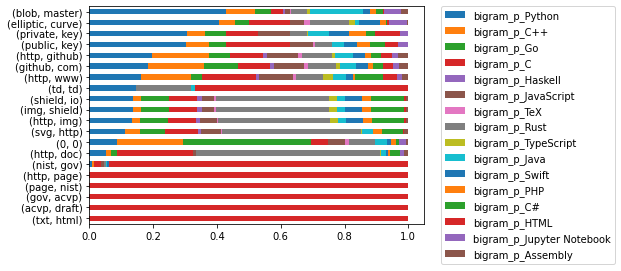

C++


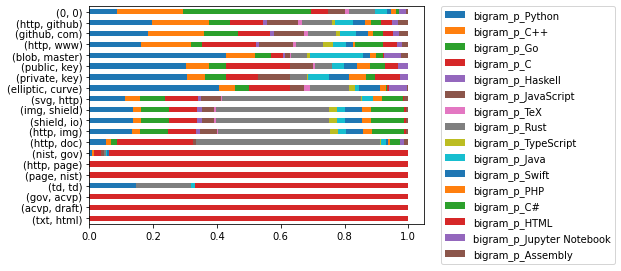

Go


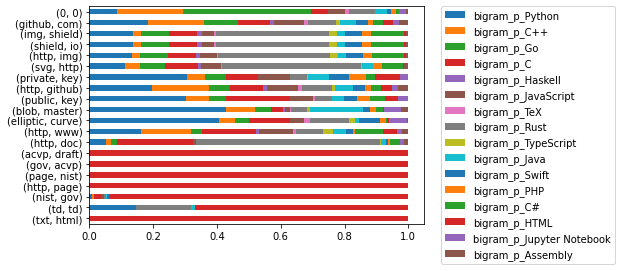

C


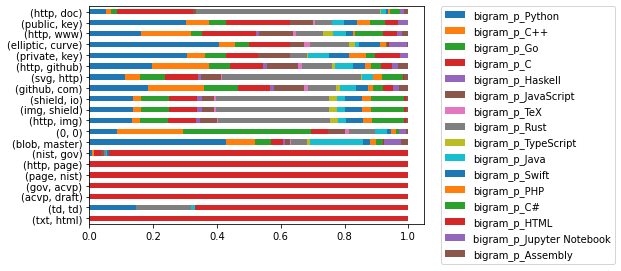

Haskell


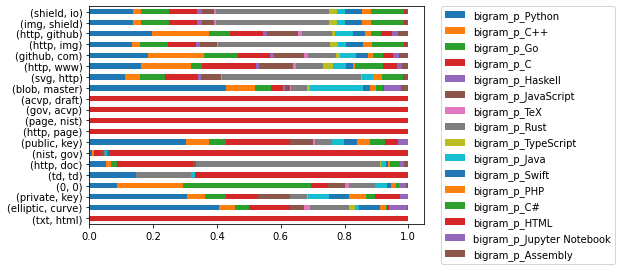

JavaScript


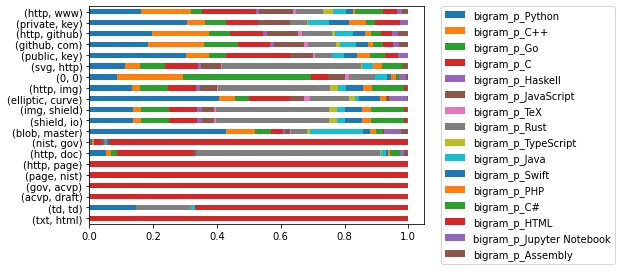

TeX


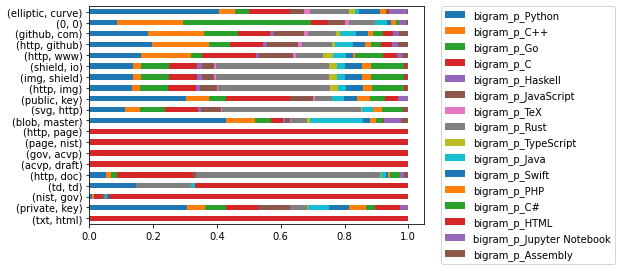

Rust


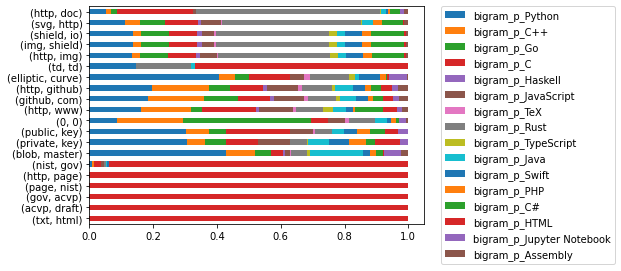

TypeScript


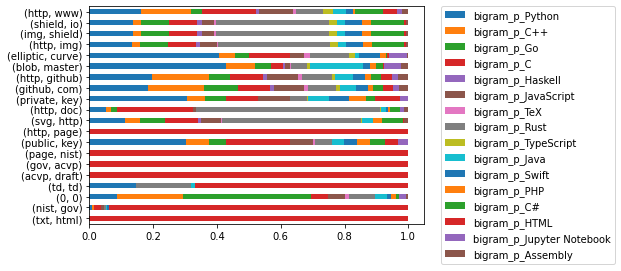

Java


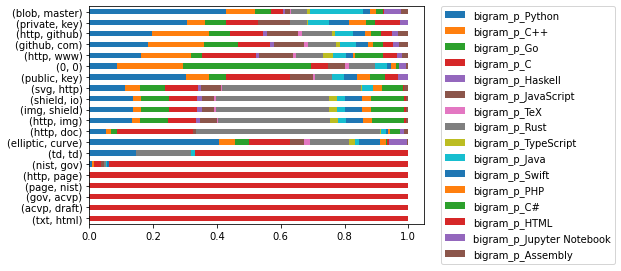

Swift


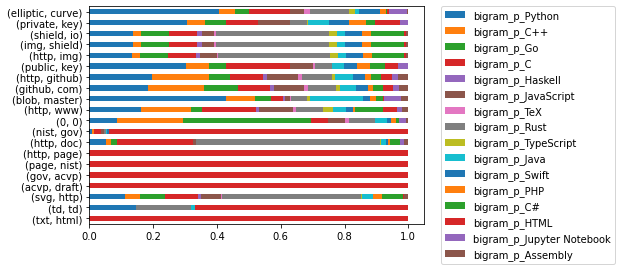

PHP


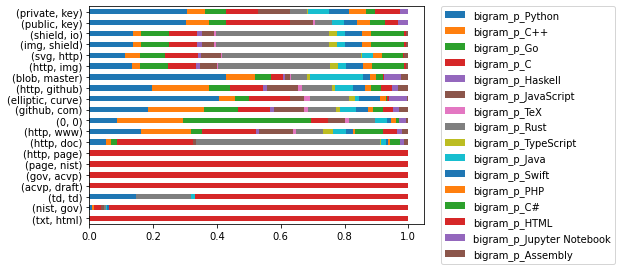

C#


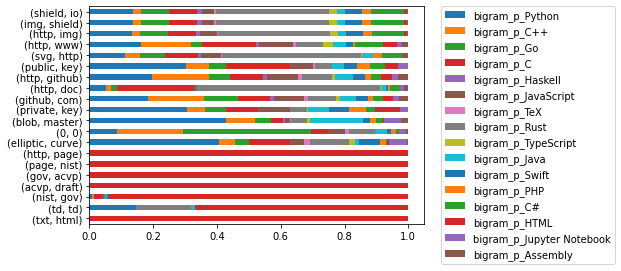

HTML


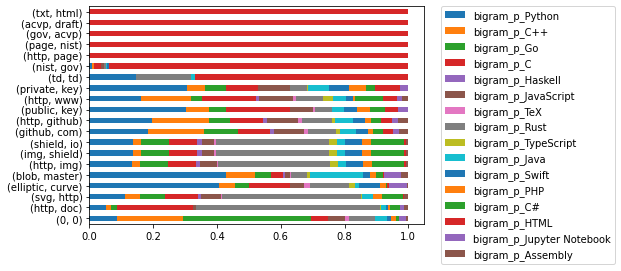

Jupyter Notebook


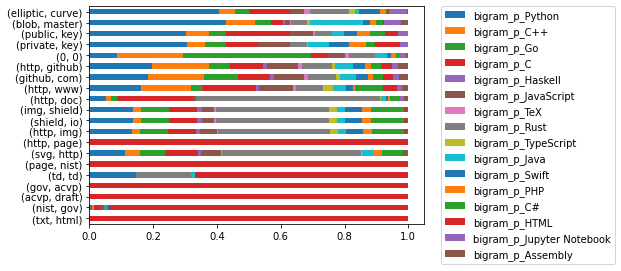

Assembly


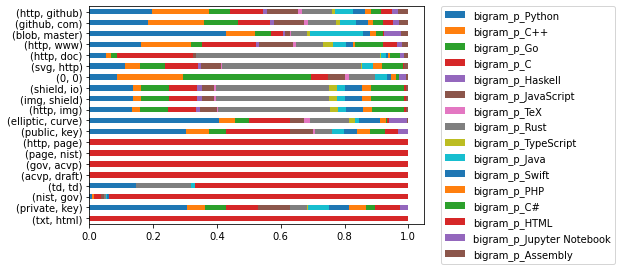

In [28]:
for lang in languages:
    print(lang)
    bigram_df[bigram_title].sort_values(by='all_bigrams').drop(columns='all_bigrams').tail(20).sort_values(f'bigram_p_{lang}').plot.barh(stacked=True)
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
    plt.show()




In [29]:
list_of_all_trigrams = []
my_trigram_sets = []

for lang in languages:
    list_of_all_bigrams.append(trigram_dict[lang])
list_of_all_trigrams = [bi for trigrams in list_of_all_trigrams for bi in trigrams]

for lang in languages:
    my_trigram_sets.append(trigram_dict[lang])
my_trigram_sets.append(list_of_all_trigrams)

my_trigram_sets = [bi for bigram_set in my_trigram_sets for bi in bigram_set]

#list_of_all_bigrams
pd.Series(my_trigram_sets, name='all_trigrams').value_counts()

final_trigram_list = []
for lang in languages:
    final_trigram_list.append(pd.Series(trigram_dict[lang], name=lang))

final_trigram_list

[0         (pyca, cryptography, image)
 1         (cryptography, image, http)
 2                  (image, http, img)
 3                 (http, img, shield)
 4                   (img, shield, io)
                      ...             
 49045      (vigenere, ceasar, cipher)
 49046    (ceasar, cipher, elementary)
 49047      (cipher, elementary, easy)
 49048         (elementary, easy, use)
 49049             (easy, use, cipher)
 Name: Python, Length: 49050, dtype: object,
 0              (botan, crypto, tl)
 1             (crypto, tl, modern)
 2                  (tl, modern, c)
 3               (modern, c, botan)
 4             (c, botan, japanese)
                    ...            
 34700         (studio, 2010, open)
 34701       (2010, open, solution)
 34702       (open, solution, file)
 34703     (solution, file, window)
 34704    (file, window, directory)
 Name: C++, Length: 34705, dtype: object,
 0               (go, cryptography, go)
 1        (cryptography, go, reference)
 2      

In [30]:
trigrams_value_counts = []
for series in final_trigram_list:
    trigrams_value_counts.append(series.value_counts())
    
trigrams_value_counts

[(http, github, com)             387
 (github, com, ashutosh1206)     154
 (com, ashutosh1206, crypton)    151
 (ul, ul, li)                    108
 (li, ul, ul)                    108
                                ... 
 (elgamal, png, ecdsa)             1
 (image, elgamal, png)             1
 (screenshot, image, elgamal)      1
 (used, screenshot, image)         1
 (easy, use, cipher)               1
 Name: Python, Length: 37111, dtype: int64,
 (http, github, com)                                                    352
 (github, com, blockchaincommons)                                        56
 (github, com, microsoft)                                                25
 (com, blockchaincommons, bc)                                            24
 (github, com, qtumproject)                                              22
                                                                       ... 
 (memory, used, array)                                                    1
 (uninitialized, 

In [31]:
total = []
for lst in final_trigram_list:
    total.append(list(lst.values))

all_trigram_value_counts = pd.Series([x for xs in total for x in xs], name='all_trigrams').value_counts()
    
trigram_df = (pd.concat(trigrams_value_counts, axis=1, sort=True)
            .set_axis(languages, axis=1, inplace=False)
            .assign(all_trigrams= all_trigram_value_counts)
            .fillna(0)
            .apply(lambda s: s.astype(int)))


trigram_title = [f'trigram_p_{lang}' for lang in languages]
for title in trigram_title:
    
    print(title)
    trigram_df[title] = trigram_df.apply(lambda x: x[title[10:]] / x.all_trigrams, axis=1)

trigram_p_Python
trigram_p_C++
trigram_p_Go
trigram_p_C
trigram_p_Haskell
trigram_p_JavaScript
trigram_p_TeX
trigram_p_Rust
trigram_p_TypeScript
trigram_p_Java
trigram_p_Swift
trigram_p_PHP
trigram_p_C#
trigram_p_HTML
trigram_p_Jupyter Notebook
trigram_p_Assembly


In [32]:
trigram_df

Python  C++  Go  C  Haskell  JavaScript  \
'           '                '             8    0   0  0        0           0   
                             'c'           1    0   0  0        0           0   
                             'f'           1    0   0  0        0           0   
                             'i'           1    0   0  0        0           0   
                             's'           1    0   0  0        0           0   
...                                      ...  ...  .. ..      ...         ...   
zypper      cppzmq           devel         0    1   0  0        0           0   
            ref              sudo          0    1   0  0        0           0   
zz          2                rr            0    4   0  0        0           0   
            pi               oo            0    1   0  0        0           0   
zz59mmox75d fgairxy2cufstoel gieae0m       0    0   0  0        0           0   

                                      TeX  Rust  TypeScript  Java  ...  \
'           '                '          0     0           0     0  ...   
                             'c'        0     0           0     0  ...   
                             'f'        0     0           0     0  ...   
                             'i'        0     0           0     0  ...   
                             's'        0     0           0     0  ...   
...                                   ...   ...         ...   ...  ...   
zypper      cppzmq           devel      0     0           0     0  ...   
            ref              sudo       0     0           0     0  ...   
zz          2                rr         0     0           0     0  ...   
            pi               oo         0     0           0     0  ...   
zz59mmox75d fgairxy2cufstoel gieae0m    0     0           0     0  ...   

                                      trigram_p_TeX  trigram_p_Rust  \
'           '                '                  0.0             0.0   
                             'c'                0.0             0.0   
                             'f'                0.0             0.0   
                             'i'                0.0             0.0   
                             's'                0.0             0.0   
...                                             ...             ...   
zypper      cppzmq           devel              0.0             0.0   
            ref              sudo               0.0             0.0   
zz          2                rr                 0.0             0.0   
            pi               oo                 0.0             0.0   
zz59mmox75d fgairxy2cufstoel gieae0m            0.0             0.0   

                                      trigram_p_TypeScript  trigram_p_Java  \
'           '                '                         0.0             0.0   
                             'c'                       0.0             0.0   
                             'f'                       0.0             0.0   
                             'i'                       0.0             0.0   
                             's'                       0.0             0.0   
...                                                    ...             ...   
zypper      cppzmq           devel                     0.0             0.0   
            ref              sudo                      0.0             0.0   
zz          2                rr                        0.0             0.0   
            pi               oo                        0.0             0.0   
zz59mmox75d fgairxy2cufstoel gieae0m                   0.0             0.0   

                                      trigram_p_Swift  trigram_p_PHP  \
'           '                '                    0.0            0.0   
                             'c'                  0.0            0.0   
                             'f'                  0.0            0.0   
                             'i'                  0.0            0.0   
                          

In [33]:
trigram_title.append('all_trigrams')



Python


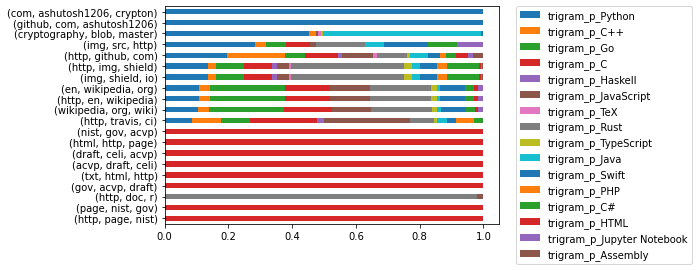

C++


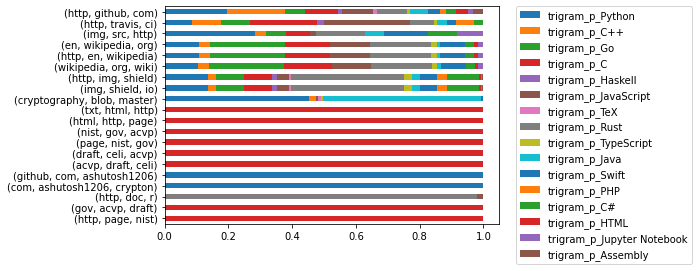

Go


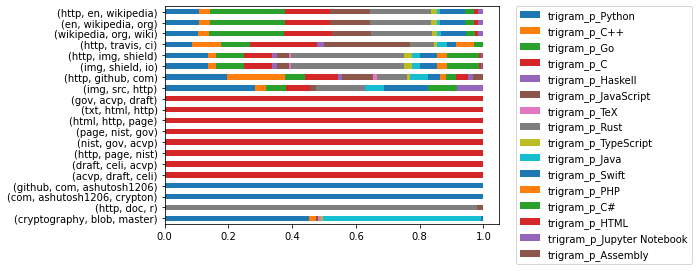

C


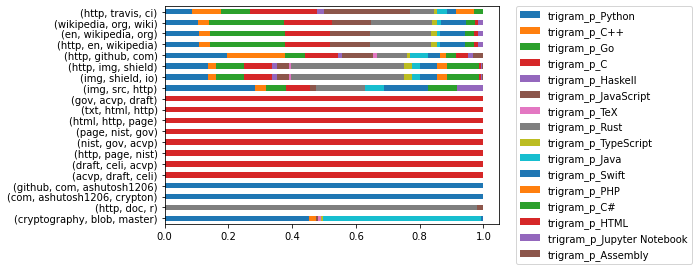

Haskell


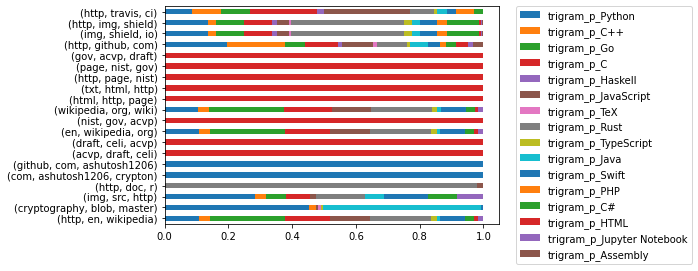

JavaScript


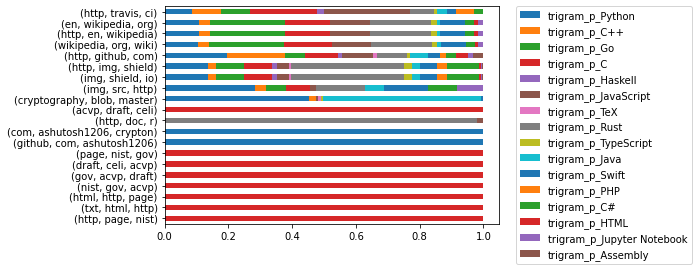

TeX


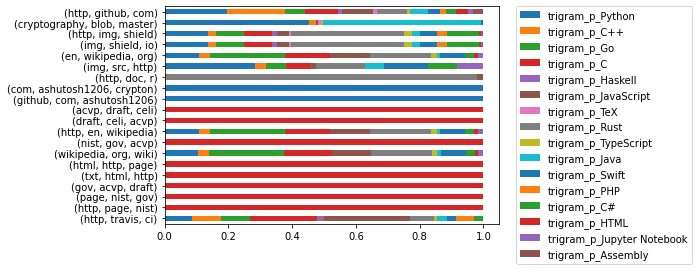

Rust


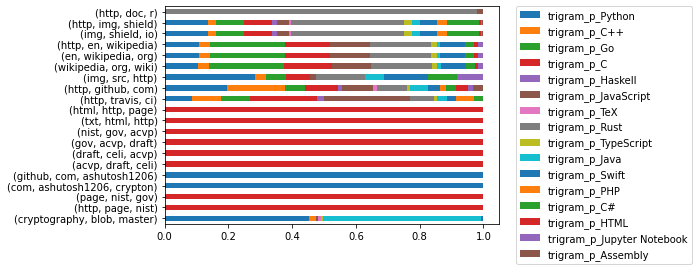

TypeScript


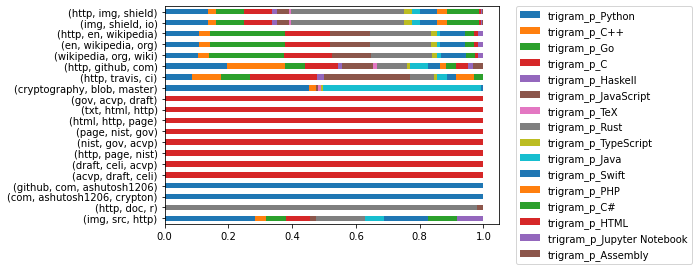

Java


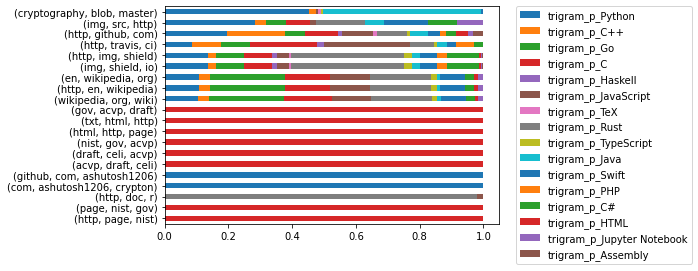

Swift


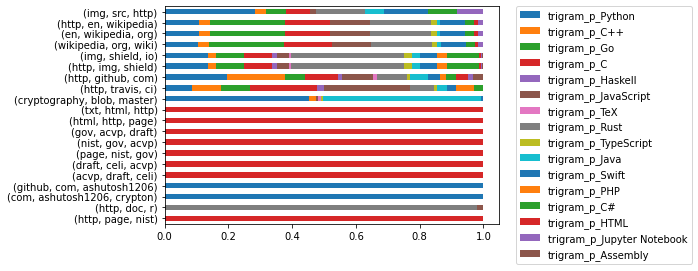

PHP


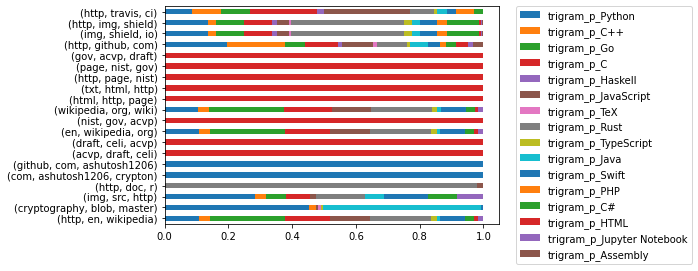

C#


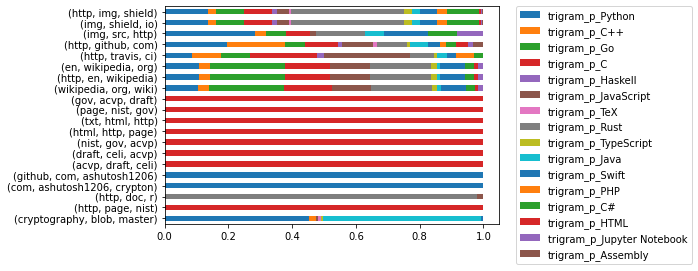

HTML


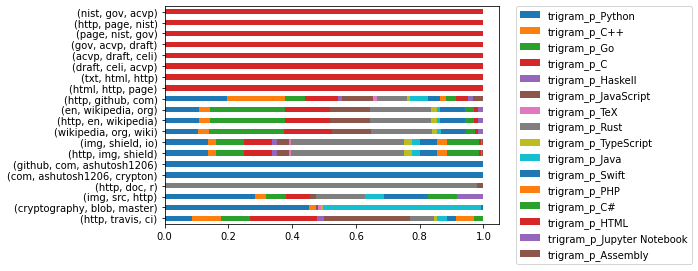

Jupyter Notebook


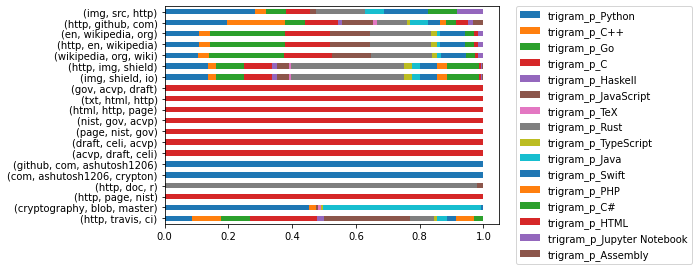

Assembly


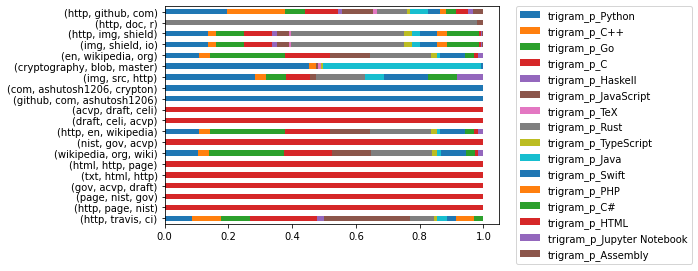

In [34]:
for lang in languages:
    print(lang)
    trigram_df[trigram_title].sort_values(by='all_trigrams').drop(columns='all_trigrams').tail(20).sort_values(f'trigram_p_{lang}').plot.barh(stacked=True)
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
    plt.show()



In [35]:

list(languages)

['Python',
 'C++',
 'Go',
 'C',
 'Haskell',
 'JavaScript',
 'TeX',
 'Rust',
 'TypeScript',
 'Java',
 'Swift',
 'PHP',
 'C#',
 'HTML',
 'Jupyter Notebook',
 'Assembly']

In [36]:
col_mask = ['p_'+lang if 'p_'+lang in freq_df.columns else False for lang in list(languages)]
print(col_mask)
freq_df[col_mask]

['p_Python', 'p_C++', 'p_Go', 'p_C', 'p_Haskell', 'p_JavaScript', 'p_TeX', 'p_Rust', 'p_TypeScript', 'p_Java', 'p_Swift', 'p_PHP', 'p_C#', 'p_HTML', 'p_Jupyter Notebook', 'p_Assembly']


p_Python     p_C++      p_Go       p_C  \
                                    0.000000  0.000000  0.000000  0.000000   
'                                   0.288462  0.043269  0.048077  0.240385   
''                                  0.100000  0.200000  0.000000  0.000000   
'0'                                 0.000000  1.000000  0.000000  0.000000   
'000102030405060708090a0b0c0d0e0f'  0.000000  0.000000  0.000000  0.000000   
...                                      ...       ...       ...       ...   
zymbit                              0.000000  0.000000  0.000000  1.000000   
zymkey                              0.000000  0.000000  0.000000  1.000000   
zypper                              0.000000  1.000000  0.000000  0.000000   
zz                                  0.000000  1.000000  0.000000  0.000000   
zz59mmox75d                         0.000000  0.000000  0.000000  0.000000   

                                    p_Haskell  p_JavaScript     p_TeX  \
                                          0.0      0.000000  0.000000   
'                                         0.0      0.240385  0.004808   
''                                        0.0      0.700000  0.000000   
'0'                                       0.0      0.000000  0.000000   
'000102030405060708090a0b0c0d0e0f'        0.0      1.000000  0.000000   
...                                       ...           ...       ...   
zymbit                                    0.0      0.000000  0.000000   
zymkey                                    0.0      0.000000  0.000000   
zypper                                    0.0      0.000000  0.000000   
zz                                        0.0      0.000000  0.000000   
zz59mmox75d                               0.0      0.000000  0.000000   

                                      p_Rust  p_TypeScript    p_Java  \
                                    0.000000      0.000000  0.000000   
'                                   0.004808      0.004808  0.019231   
''                                  0.000000      0.000000  0.000000   
'0'                                 0.000000      0.000000  0.000000   
'000102030405060708090a0b0c0d0e0f'  0.000000      0.000000  0.000000   
...                                      ...           ...       ...   
zymbit                              0.000000      0.000000  0.000000   
zymkey                              0.000000      0.000000  0.000000   
zypper                              0.000000      0.000000  0.000000   
zz                                  0.000000      0.000000  0.000000   
zz59mmox75d                         0.000000      0.000000  0.000000   

                                     p_Swift     p_PHP  p_C#  p_HTML  \
                                    0.000000  0.000000   0.0     0.0   
'                                   0.009615  0.043269   0.0     0.0   
''                                  0.000000  0.000000   0.0     0.0   
'0'                                 0.000000  0.000000   0.0     0.0   
'000102030405060708090a0b0c0d0e0f'  0.000000  0.000000   0.0     0.0   
...                                      ...       ...   ...     ...   
zymbit                              0.000000  0.000000   0.0     0.0   
zymkey                              0.000000  0.000000   0.0     0.0   
zypper                              0.000000  0.000000   0.0     0.0   
zz                                  0.000000  0.000000   0.0     0.0   
zz59mmox75d                         0.000000  1.000000   0.0     0.0   

                                    p_Jupyter Notebook  p_Assembly  
                                              0.000000    0.000000  
'                                             0.048077    0.004808  
''                                            0.000000    0.000000  
'0'                                           0.000000    0.000000  
'000102030405060708090a0b0c0d0e0f'            0.000000    0.000000  
...                                                ...         ...  
zymbit   

In [37]:
freq_df.sort_values(by='Python', ascending=False)
freq_df = freq_df[languages]

In [38]:
[d for d not in list(languages)]

SyntaxError: invalid syntax (1607750226.py, line 1)

In [41]:
bigram_df

Python  C++  Go  C  Haskell  JavaScript  TeX  \
'           '                     20    1   0  5        0           2    0   
            '9c42                  0    0   0  0        0           1    0   
            'c'                    1    0   0  0        0           0    0   
            'f'                    1    0   0  0        0           0    0   
            'i'                    1    0   0  0        0           0    0   
...                              ...  ...  .. ..      ...         ...  ...   
zypper      cppzmq                 0    1   0  0        0           0    0   
            ref                    0    1   0  0        0           0    0   
zz          2                      0    4   0  0        0           0    0   
            pi                     0    1   0  0        0           0    0   
zz59mmox75d fgairxy2cufstoel       0    0   0  0        0           0    0   

                              Rust  TypeScript  Java  ...  bigram_p_TeX  \
'           '                    0           0     0  ...           0.0   
            '9c42                0           0     0  ...           0.0   
            'c'                  0           0     0  ...           0.0   
            'f'                  0           0     0  ...           0.0   
            'i'                  0           0     0  ...           0.0   
...                            ...         ...   ...  ...           ...   
zypper      cppzmq               0           0     0  ...           0.0   
            ref                  0           0     0  ...           0.0   
zz          2                    0           0     0  ...           0.0   
            pi                   0           0     0  ...           0.0   
zz59mmox75d fgairxy2cufstoel     0           0     0  ...           0.0   

                              bigram_p_Rust  bigram_p_TypeScript  \
'           '                           0.0                  0.0   
            '9c42                       0.0                  0.0   
            'c'                         0.0                  0.0   
            'f'                         0.0                  0.0   
            'i'                         0.0                  0.0   
...                                     ...                  ...   
zypper      cppzmq                      0.0                  0.0   
            ref                         0.0                  0.0   
zz          2                           0.0                  0.0   
            pi                          0.0                  0.0   
zz59mmox75d fgairxy2cufstoel            0.0                  0.0   

                              bigram_p_Java  bigram_p_Swift  bigram_p_PHP  \
'           '                           0.0             0.0      0.032258   
            '9c42                       0.0             0.0      0.000000   
            'c'                         0.0             0.0      0.000000   
            'f'                         0.0             0.0      0.000000   
            'i'                         0.0             0.0      0.000000   
...                                     ...             ...           ...   
zypper      cppzmq                      0.0             0.0      0.000000   
            ref                         0.0             0.0      0.000000   
zz          2                           0.0             0.0      0.000000   
            pi                          0.0             0.0      0.000000   
zz59mmox75d fgairxy2cufstoel            0.0             0.0      1.000000   

                              bigram_p_C#  bigram_p_HTML  \
'           '                         0.0            0.0   
            '9c42                     0.0            0.0   
            'c'                       0.0            0.0   
            'f'                       0.0            0.0   
            'i'                       0.0            0.0   
...                                   ...            ...   
zypper      cppzmq            

In [40]:
trigram_df

Python  C++  Go  C  Haskell  JavaScript  \
'           '                '             8    0   0  0        0           0   
                             'c'           1    0   0  0        0           0   
                             'f'           1    0   0  0        0           0   
                             'i'           1    0   0  0        0           0   
                             's'           1    0   0  0        0           0   
...                                      ...  ...  .. ..      ...         ...   
zypper      cppzmq           devel         0    1   0  0        0           0   
            ref              sudo          0    1   0  0        0           0   
zz          2                rr            0    4   0  0        0           0   
            pi               oo            0    1   0  0        0           0   
zz59mmox75d fgairxy2cufstoel gieae0m       0    0   0  0        0           0   

                                      TeX  Rust  TypeScript  Java  ...  \
'           '                '          0     0           0     0  ...   
                             'c'        0     0           0     0  ...   
                             'f'        0     0           0     0  ...   
                             'i'        0     0           0     0  ...   
                             's'        0     0           0     0  ...   
...                                   ...   ...         ...   ...  ...   
zypper      cppzmq           devel      0     0           0     0  ...   
            ref              sudo       0     0           0     0  ...   
zz          2                rr         0     0           0     0  ...   
            pi               oo         0     0           0     0  ...   
zz59mmox75d fgairxy2cufstoel gieae0m    0     0           0     0  ...   

                                      trigram_p_TeX  trigram_p_Rust  \
'           '                '                  0.0             0.0   
                             'c'                0.0             0.0   
                             'f'                0.0             0.0   
                             'i'                0.0             0.0   
                             's'                0.0             0.0   
...                                             ...             ...   
zypper      cppzmq           devel              0.0             0.0   
            ref              sudo               0.0             0.0   
zz          2                rr                 0.0             0.0   
            pi               oo                 0.0             0.0   
zz59mmox75d fgairxy2cufstoel gieae0m            0.0             0.0   

                                      trigram_p_TypeScript  trigram_p_Java  \
'           '                '                         0.0             0.0   
                             'c'                       0.0             0.0   
                             'f'                       0.0             0.0   
                             'i'                       0.0             0.0   
                             's'                       0.0             0.0   
...                                                    ...             ...   
zypper      cppzmq           devel                     0.0             0.0   
            ref              sudo                      0.0             0.0   
zz          2                rr                        0.0             0.0   
            pi               oo                        0.0             0.0   
zz59mmox75d fgairxy2cufstoel gieae0m                   0.0             0.0   

                                      trigram_p_Swift  trigram_p_PHP  \
'           '                '                    0.0            0.0   
                             'c'                  0.0            0.0   
                             'f'                  0.0            0.0   
                             'i'                  0.0            0.0   
                          

In [42]:
def idf(df, word):
    total_doc_number = 407
    occurences = sum([1 for doc in df.lemm.values if word in doc])
    try:
        return total_doc_number / occurences
    except:
        return 0
    
our_idf = {}

for i, word in freq_df.iterrows():
    our_idf[i] = idf(df,i)
pd.DataFrame({'idf':list(our_idf.values())},index=freq_df.index)



idf
                                      1.000000
'                                     1.596078
''                                   40.700000
'0'                                 407.000000
'000102030405060708090a0b0c0d0e0f'  407.000000
...                                        ...
zymbit                              407.000000
zymkey                              407.000000
zypper                              407.000000
zz                                   22.611111
zz59mmox75d                         407.000000

[21496 rows x 1 columns]

In [43]:
freq_df['idf'] = list(our_idf.values())
freq_df


Python  C++  Go   C  Haskell  JavaScript  \
                                         0    0   0   0        0           0   
'                                       60    9  10  50        0          50   
''                                       1    2   0   0        0           7   
'0'                                      0    1   0   0        0           0   
'000102030405060708090a0b0c0d0e0f'       0    0   0   0        0           2   
...                                    ...  ...  ..  ..      ...         ...   
zymbit                                   0    0   0   1        0           0   
zymkey                                   0    0   0   1        0           0   
zypper                                   0    2   0   0        0           0   
zz                                       0    5   0   0        0           0   
zz59mmox75d                              0    0   0   0        0           0   

                                    TeX  Rust  TypeScript  Java  Swift  PHP  \
                                      0     0           0     0      0    0   
'                                     1     1           1     4      2    9   
''                                    0     0           0     0      0    0   
'0'                                   0     0           0     0      0    0   
'000102030405060708090a0b0c0d0e0f'    0     0           0     0      0    0   
...                                 ...   ...         ...   ...    ...  ...   
zymbit                                0     0           0     0      0    0   
zymkey                                0     0           0     0      0    0   
zypper                                0     0           0     0      0    0   
zz                                    0     0           0     0      0    0   
zz59mmox75d                           0     0           0     0      0    1   

                                    C#  HTML  Jupyter Notebook  Assembly  \
                                     0     0                 0         0   
'                                    0     0                10         1   
''                                   0     0                 0         0   
'0'                                  0     0                 0         0   
'000102030405060708090a0b0c0d0e0f'   0     0                 0         0   
...                                 ..   ...               ...       ...   
zymbit                               0     0                 0         0   
zymkey                               0     0                 0         0   
zypper                               0     0                 0         0   
zz                                   0     0                 0         0   
zz59mmox75d                          0     0                 0         0   

                                           idf  
                                      1.000000  
'                                     1.596078  
''                                   40.700000  
'0'                                 407.000000  
'000102030405060708090a0b0c0d0e0f'  407.000000  
...                                        ...  
zymbit                              407.000000  
zymkey                              407.000000  
zypper                              407.000000  
zz                                   22.611111  
zz59mmox75d                         407.000000  

[21496 rows x 17 columns]

In [44]:
freq_df['total'] = freq_df.apply(lambda x: x[languages].sum(), axis=1)
freq_df

Python  C++  Go   C  Haskell  JavaScript  \
                                         0    0   0   0        0           0   
'                                       60    9  10  50        0          50   
''                                       1    2   0   0        0           7   
'0'                                      0    1   0   0        0           0   
'000102030405060708090a0b0c0d0e0f'       0    0   0   0        0           2   
...                                    ...  ...  ..  ..      ...         ...   
zymbit                                   0    0   0   1        0           0   
zymkey                                   0    0   0   1        0           0   
zypper                                   0    2   0   0        0           0   
zz                                       0    5   0   0        0           0   
zz59mmox75d                              0    0   0   0        0           0   

                                    TeX  Rust  TypeScript  Java  Swift  PHP  \
                                      0     0           0     0      0    0   
'                                     1     1           1     4      2    9   
''                                    0     0           0     0      0    0   
'0'                                   0     0           0     0      0    0   
'000102030405060708090a0b0c0d0e0f'    0     0           0     0      0    0   
...                                 ...   ...         ...   ...    ...  ...   
zymbit                                0     0           0     0      0    0   
zymkey                                0     0           0     0      0    0   
zypper                                0     0           0     0      0    0   
zz                                    0     0           0     0      0    0   
zz59mmox75d                           0     0           0     0      0    1   

                                    C#  HTML  Jupyter Notebook  Assembly  \
                                     0     0                 0         0   
'                                    0     0                10         1   
''                                   0     0                 0         0   
'0'                                  0     0                 0         0   
'000102030405060708090a0b0c0d0e0f'   0     0                 0         0   
...                                 ..   ...               ...       ...   
zymbit                               0     0                 0         0   
zymkey                               0     0                 0         0   
zypper                               0     0                 0         0   
zz                                   0     0                 0         0   
zz59mmox75d                          0     0                 0         0   

                                           idf  total  
                                      1.000000    0.0  
'                                     1.596078  208.0  
''                                   40.700000   10.0  
'0'                                 407.000000    1.0  
'000102030405060708090a0b0c0d0e0f'  407.000000    2.0  
...                                        ...    ...  
zymbit                              407.000000    1.0  
zymkey                              407.000000    1.0  
zypper                              407.000000    2.0  
zz                                   22.611111    5.0  
zz59mmox75d                         407.000000    1.0  

[21496 rows x 18 columns]

In [45]:
freq_df['tf-idf'] = df.idf 

AttributeError: 'DataFrame' object has no attribute 'idf'

In [46]:
freq_df.sort_values(by='total').tail(20)


Python  C++   Go    C  Haskell  JavaScript  TeX  Rust  \
example          149  148   35  201        8          91    2   151   
file             222  118   38  237       13          97    2    33   
io               123   82   71   85        8          57    4   314   
using            176  137   56  199        7          52    4    75   
function         144   56    7  222        3         111    5    46   
hash             163   35   12  197        1         154    3   115   
library           73  219   54  297       18          87    2   133   
crypto            62  141   54  295       16         155    7    77   
test             148  150   53  355       14          86    0    91   
cryptography     313   54   18  119        5          74   37    52   
2                218  136   73  174       12          61    8   267   
build            177  379   38  227       18          56    3   142   
use              156  213   55  250       12         102   15   190   
org              162  176  182  203       21         201   20   155   
1                307  193  127  246        4         124   13   227   
0                430  236  266  186       12          81   15   162   
github           444  411  254  250       42         237   29   237   
key              649  202  135  665        1         284    4   149   
com              607  502  429  422       42         299   32   242   
http             926  723  504  731       73         623   62   843   

              TypeScript  Java  Swift  PHP   C#  HTML  Jupyter Notebook  \
example                8    36      9   28    7    30                 6   
file                  12    52     16   17   15    31                13   
io                    10    25     41   16   53    22                13   
using                 22    46     59   26   52    16                18   
function              42    13     26   17   25   219                 2   
hash                  12    67     39   34   61    60                 2   
library                8    46     19   23   35    21                 9   
crypto                17    34     12   15   13   129                31   
test                   6    97      4    9    9    39                22   
cryptography          65   194     45    7  115    25                31   
2                      9    54     37   27   21    47                 8   
build                  9    25     18    7   35     8                21   
use                   19    35     45   52   44    49                32   
org                   23    67     58   50   51    37                15   
1                     16    64     35   42   44    82                47   
0                     10    48     33   64   59    32                24   
github                27   123     94   44   89    95                39   
key                   17   140    173   66   77   336                33   
com                   56   198    126   66  151    88                67   
http                  94   273    216  129  278   571               109   

              Assembly       idf   total  
example             12  2.211957   921.0  
file                14  1.995098   930.0  
io                  15  1.057143   939.0  
using                8  1.761905   953.0  
function            18  2.481707   956.0  
hash                40  2.949275   995.0  
library             16  1.884259  1060.0  
crypto               3  1.159544  1061.0  
test                48  1.695833  1131.0  
cryptography         8  1.800885  1162.0  
2                   23  1.186589  1175.0  
build               27  1.928910  1190.0  
use                 25  1.334426  1294.0  
org                 23  1.393836  1444.0  
1                   46  1.172911  1617.0  
0                   26  1.225904  1684.0  
github              75  1.413194  2490.0  
key                 19  1.746781  2950.0  
com                 80  1.094086  3407.0  
http               117  1.127424  6272.0

In [148]:
new_df = df.dropna().copy()


In [156]:
total_lst = {}
for lang in languages:
    bigram_lst = []
    for big in list(bigram_df[bigram_df[lang] > 0].index):
        bigram_lst.append('-'.join(big))
    new_lemm = new_lemm.append(pd.Series([" ".join(bigram_lst)]))
    new_lang =new_lang.append(pd.Series([lang]))
    
new_lang.size

    

423

In [157]:
new_lemm.size

423

(407,)

(407,)

In [141]:
python_bigrams

"'-' '-'c' '-'f' '-'i' '-'s' '-'t' '-4 '-b '-builtins '-capsule '-doc '-eea2 '-f '-file '-find '-found '-get '-hash1 '-hash2 '-help '-hpi '-mil '-name '-package '-path '-result '-topc '-uea2 '-x00 '-x13r '-xabs '-xd6 '-xf7 '-zuc ''-315c4eeaa8b5f8aaf9174145bf43e1784b8fa00dc71d885a804e5ee9fa40b16349c146fb778cdf2d3aff021dfff5b403b510d0d0455468aeb98622b137dae857553ccd8883a7bc37520e06e515d22c954eba5025b8cc57ee59418ce7dc6bc41556bdb36bbca3e8774301fbcaa3b83b220809560987815f65286764703de0f3d524400a19b159610b11ef3e '022799c0d0ee09772fdd337d4f28dc155581951d07082fb19a38aa396b67e77759'-vk '0x18'-hash4 '0x20f82026a01daffae45cfdc8l'-hash1 '0xf00020585012016060260443bab0f7d76fde5549a6857ecl'-careful '14-challenge '8000000000000001b8'-recognize '8w-h0qi 'a-really 'a'-'l' 'a'-23 'a'-hn 'a'-match 'a'-ue 'aeq'-200 'aes-256 'aes-3gpp' 'answer'-'here' 'b'-12 'b'-match 'bears'-'bears' 'bears'-caveat 'bitcoin-cryptography' 'bitcoin'-attribute 'c'-'r' 'c'-'y' 'c'-37 'c'-index 'c'-match 'c'-would 'c0'-pyasn1 'c

In [121]:
df

repo language  \
0                          pyca/cryptography   Python   
1              sobolevn/awesome-cryptography      NaN   
2                            randombit/botan      C++   
3                              golang/crypto       Go   
4                          pycrypto/pycrypto   Python   
..                                       ...      ...   
434                               coyim/otr3       Go   
435  iam-raihan/3DES-ECB-Cryptography-in-PHP      PHP   
436                          ZK-Garage/plonk     Rust   
437                        merklecounty/rget       Go   
438         CardanoSharp/cardanosharp-wallet       C#   

                                       readme_contents  \
0    pyca/cryptography\n=================\n\n.. ima...   
1    # Awesome Cryptography [![Awesome](https://cdn...   
2    Botan: Crypto and TLS for Modern C++\n========...   
3    # Go Cryptography\n\n[![Go Reference](https://...   
4    | ⚠️ WARNING                                  ...   
..                                                 ...   
434  # OTR3 \n\n[![Build Status](https://github.com...   
435                                                NaN   
436  # PLONK\n[![CI checks](https://github.com/ZK-G...   
437  # rget\n\n**Archived Project Warning**: rget i...   
438  # CardanoSharp.Wallet \r\n[![Build status](htt...   

                                               cleaned  \
0    pyca cryptography image https img shields io p...   
1    awesome cryptography awesome https cdn rawgit ...   
2    botan crypto tls modern c botan japanese peony...   
3    go cryptography go reference https pkg go dev ...   
4    warning pycrypto 2 x unmaintained obsolete con...   
..                                                 ...   
434  otr3 build status https com coyim otr3 workflo...   
435                                                NaN   
436  plonk ci checks https com zk garage plonk acti...   
437  rget archived project warning rget archived ar...   
438  cardanosharp wallet build status https ci appv...   

                                    without_stop_words  \
0    pyca cryptography image https img shields io p...   
1    awesome cryptography awesome https cdn rawgit ...   
2    botan crypto tls modern c botan japanese peony...   
3    go cryptography go reference https pkg go dev ...   
4    warning pycrypto 2 x unmaintained obsolete con...   
..                                                 ...   
434  otr3 build status https com coyim otr3 workflo...   
435                                                NaN   
436  plonk ci checks https com zk garage plonk acti...   
437  rget archived project warning rget archived ar...   
438  cardanosharp wallet build status https ci appv...   

                                             tokenized  \
0    pyca cryptography image https img shields io p...   
1    awesome cryptography awesome https cdn rawgit ...   
2    botan crypto tls modern c botan japanese peony...   
3    go cryptography go reference https pkg go dev ...   
4    warning pycrypto 2 x unmaintained obsolete con...   
..                                                 ...   
434  otr3 build status https com coyim otr3 workflo...   
435                                                NaN   
436  plonk ci checks https com zk garage plonk acti...   
437  rget archived project warning rget archived ar...   
438  cardanosharp wallet build status https ci appv...   

                                                  stem  \
0    pyca cryptographi imag http img shield io pypi...   
1    awesom cryptographi awesom http cdn rawgit com...   
2    botan crypto tl modern c botan japanes peoni f...   
3    go cryptographi go refer http pkg go dev badg ...   
4    warn pycrypto 2 x unmaintain obsolet contain s...   
..                                                 ...   
434  otr3 build statu http com coyim otr3 workflow ...   
435                                                NaN   
436  plonk ci check http com zk garag plonk a

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,3))
tfidfs = tfidf.fit_transform(df.dropna().lemm.values)
tfidfs

<407x363258 sparse matrix of type '<class 'numpy.float64'>'
	with 489420 stored elements in Compressed Sparse Row format>

In [48]:
without_na.shape

NameError: name 'without_na' is not defined

In [49]:
tfidf_df.reset_index()

NameError: name 'tfidf_df' is not defined

In [50]:
df.dropna().language.value_counts()

Python              73
C                   61
JavaScript          51
Rust                48
C++                 36
Go                  24
Java                21
C#                  20
HTML                15
PHP                 12
TeX                 10
Swift                9
TypeScript           8
Jupyter Notebook     7
Haskell              6
Assembly             6
Name: language, dtype: int64

In [51]:
df.dropna().language.value_counts().sum()

407

In [93]:
73/407

0.17936117936117937

In [172]:
tfidf_df = pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())
col = pd.DataFrame({'programming_language_99': df.dropna().reset_index().drop(columns='index').language.values})

encoded_df = pd.concat([tfidf_df, col], axis=1)



In [170]:
encoded_df

00       000      0000  000000  00000000  \
0    0.000000  0.000000  0.000000     0.0       0.0   
1    0.000000  0.000000  0.000000     0.0       0.0   
2    0.000000  0.000000  0.000000     0.0       0.0   
3    0.000000  0.000000  0.000000     0.0       0.0   
4    0.000000  0.000000  0.000000     0.0       0.0   
..        ...       ...       ...     ...       ...   
418  0.010672  0.000000  0.000000     0.0       0.0   
419  0.000000  0.000000  0.000000     0.0       0.0   
420  0.000000  0.004293  0.005118     0.0       0.0   
421  0.000000  0.007836  0.000000     0.0       0.0   
422  0.015617  0.000000  0.000000     0.0       0.0   

     0000000000000000000000000000000000000000000000000000000000000000  \
0                                             0.000000                  
1                                             0.000000                  
2                                             0.000000                  
3                                             0.000000                  
4                                             0.000000                  
..                                                 ...                  
418                                           0.000000                  
419                                           0.007855                  
420                                           0.000000                  
421                                           0.000000                  
422                                           0.000000                  

     0000000000000000000000000000000000000000000000000000000000000001  \
0                                                  0.0                  
1                                                  0.0                  
2                                                  0.0                  
3                                                  0.0                  
4                                                  0.0                  
..                                                 ...                  
418                                                0.0                  
419                                                0.0                  
420                                                0.0                  
421                                                0.0                  
422                                                0.0                  

     00000000000000000000000000000011  00000000000000000000000000001111  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 0.0                               0.0   
4                                 0.0                               0.0   
..                                ...                               ...   
418                               0.0                               0.0   
419                               0.0                               0.0   
420                               0.0                               0.0   
421                               0.0                               0.0   
422                               0.0                               0.0   

     00000010  ...  zvqczfzr124   zx  zxa  zxfw  zymbit  zymkey  zypper   zz  \
0         0.0  ...          0.0  0.0  0.0   0.0     0.0     0.0     0.0  0.0   
1         0.0  ...          0.0  0.0  0.0   0.0     0.0     0.0     0.0  0.0   
2         0.0  ...          0.0  0.0  0.0   0.0     0.0     0.0     0.0  0.0   
3         0.0  ...          0.0  0.0  0.0   0.0     0.0     0.0     0.0  0.0   
4         0.0  ...          0.0  0.0  0.0   0.0     0.0     0.0     0.0  0.0   
..        ...  ...          ...  ...  ...   ...     ...     ...     ...  ...   
418       0.0  ...          0.0  0.0  0.0   0.0     0.0     0.0     0.0  0.0   
419       0.0  ...          0.0  0.0  0.0   0.0     0.0

In [53]:
tfidf_df

00  000  0000  000000  00000000  \
0    0.000000  0.0   0.0     0.0       0.0   
1    0.000000  0.0   0.0     0.0       0.0   
2    0.000000  0.0   0.0     0.0       0.0   
3    0.000000  0.0   0.0     0.0       0.0   
4    0.000000  0.0   0.0     0.0       0.0   
..        ...  ...   ...     ...       ...   
402  0.000000  0.0   0.0     0.0       0.0   
403  0.000000  0.0   0.0     0.0       0.0   
404  0.016355  0.0   0.0     0.0       0.0   
405  0.000000  0.0   0.0     0.0       0.0   
406  0.000000  0.0   0.0     0.0       0.0   

     0000000000000000000000000000000000000000000000000000000000000000  \
0                                             0.000000                  
1                                             0.000000                  
2                                             0.000000                  
3                                             0.000000                  
4                                             0.000000                  
..                                                 ...                  
402                                           0.000000                  
403                                           0.000000                  
404                                           0.000000                  
405                                           0.000000                  
406                                           0.018124                  

     0000000000000000000000000000000000000000000000000000000000000001  \
0                                                  0.0                  
1                                                  0.0                  
2                                                  0.0                  
3                                                  0.0                  
4                                                  0.0                  
..                                                 ...                  
402                                                0.0                  
403                                                0.0                  
404                                                0.0                  
405                                                0.0                  
406                                                0.0                  

     00000000000000000000000000000011  00000000000000000000000000001111  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 0.0                               0.0   
4                                 0.0                               0.0   
..                                ...                               ...   
402                               0.0                               0.0   
403                               0.0                               0.0   
404                               0.0                               0.0   
405                               0.0                               0.0   
406                               0.0                               0.0   

     00000010  ...  zuur  zvqczfzr124   zx  zxa  zxfw  zymbit  zymkey  zypper  \
0         0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
1         0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
2         0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
3         0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
4         0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
..        ...  ...   ...          ...  ...  ...   ...     ...     ...     ...   
402       0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
403       0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
404       0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     

In [54]:
df.isna().sum()

repo                  0
language              0
readme_contents       0
cleaned               0
without_stop_words    0
tokenized             0
stem                  0
lemm                  0
dtype: int64

In [58]:
na = df.dropna()


In [173]:
import exploration
import modeling as md
import split

# creates train, validate, test from original df
# df should be encoded and should have target var column
train, validate, test = split.train_validate_test_split(encoded_df, 'programming_language_99')


# creates about ~150 different classification models
# with varying parameters
md.all_reports(train, validate, test, 'programming_language_99')

# This is a dataframe of the results,
# you can sort it and access columns like any
# normal df.
md.Results.total_summary

model_type  depth  train_accuracy  validate_accuracy  difference  \
0         decision_tree    1.0        0.277533           0.265306    0.012227   
1         decision_tree    2.0        0.370044           0.326531    0.043513   
2         decision_tree    3.0        0.422907           0.357143    0.065765   
3         decision_tree    4.0        0.466960           0.397959    0.069001   
4         decision_tree    5.0        0.511013           0.387755    0.123258   
..                  ...    ...             ...                ...         ...   
95  logistic_regression    NaN        1.000000           0.500000    0.500000   
96  logistic_regression    NaN        1.000000           0.500000    0.500000   
97  logistic_regression    NaN        1.000000           0.500000    0.500000   
98  logistic_regression    NaN        1.000000           0.500000    0.500000   
99  logistic_regression    NaN        1.000000           0.500000    0.500000   

    percent_diff  min_samples_leaf  n_nearest_neighbor     C  
0           4.41               NaN                 NaN   NaN  
1          11.76               NaN                 NaN   NaN  
2          15.55               NaN                 NaN   NaN  
3          14.78               NaN                 NaN   NaN  
4          24.12               NaN                 NaN   NaN  
..           ...               ...                 ...   ...  
95         50.00               NaN                 NaN   9.6  
96         50.00               NaN                 NaN   9.7  
97         50.00               NaN                 NaN   9.8  
98         50.00               NaN                 NaN   9.9  
99         50.00               NaN                 NaN  10.0  

[306 rows x 9 columns]

In [175]:
md.Results.total_summary.sort_values(by='validate_accuracy', ascending=False)

model_type  depth  train_accuracy  validate_accuracy  difference  \
10     knn_uniform    NaN        0.550661           0.551020   -0.000360   
7      knn_uniform    NaN        0.594714           0.540816    0.053897   
22    knn_distance    NaN        1.000000           0.540816    0.459184   
8      knn_uniform    NaN        0.581498           0.530612    0.050886   
24    knn_distance    NaN        1.000000           0.530612    0.469388   
..             ...    ...             ...                ...         ...   
4   random_forests    5.0        0.220264           0.173469    0.046795   
3   random_forests    4.0        0.211454           0.173469    0.037984   
2   random_forests    3.0        0.202643           0.173469    0.029174   
1   random_forests    2.0        0.185022           0.173469    0.011553   
0   random_forests    1.0        0.180617           0.173469    0.007147   

    percent_diff  min_samples_leaf  n_nearest_neighbor   C  
10         -0.07               NaN                11.0 NaN  
7           9.06               NaN                 8.0 NaN  
22         45.92               NaN                 9.0 NaN  
8           8.75               NaN                 9.0 NaN  
24         46.94               NaN                11.0 NaN  
..           ...               ...                 ...  ..  
4          21.24              11.0                 NaN NaN  
3          17.96              12.0                 NaN NaN  
2          14.40              13.0                 NaN NaN  
1           6.24              14.0                 NaN NaN  
0           3.96              15.0                 NaN NaN  

[306 rows x 9 columns]

In [176]:
encoded_df.language.value_counts()

0.000000    362
0.007913      1
0.006050      1
0.008695      1
0.044152      1
0.004146      1
0.002290      1
0.008157      1
0.006478      1
0.003848      1
0.018980      1
0.003856      1
0.016835      1
0.003252      1
0.003386      1
0.051656      1
0.006208      1
0.025593      1
0.003161      1
0.037888      1
0.024791      1
0.060841      1
0.003557      1
0.007863      1
0.014584      1
0.011256      1
0.017538      1
0.123590      1
0.011359      1
0.007198      1
0.012677      1
0.006459      1
0.020057      1
0.006501      1
0.013571      1
0.049929      1
0.003293      1
0.065354      1
0.049824      1
0.009647      1
0.006564      1
0.010614      1
0.006856      1
0.014836      1
0.029490      1
0.092340      1
Name: language, dtype: int64

In [65]:
encoded_df.language.dtypes

language    float64
language     object
dtype: object

In [67]:
encoded_df.language = encoded_df.language.astype('object')

In [68]:
encoded_df.language.dtypes

language    object
language    object
dtype: object

In [70]:
encoded_df.language.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [74]:
encoded_df = encoded_df.drop(columns='language')
encoded_df

00  000  0000  000000  00000000  \
0    0.000000  0.0   0.0     0.0       0.0   
1    0.000000  0.0   0.0     0.0       0.0   
2    0.000000  0.0   0.0     0.0       0.0   
3    0.000000  0.0   0.0     0.0       0.0   
4    0.000000  0.0   0.0     0.0       0.0   
..        ...  ...   ...     ...       ...   
402  0.000000  0.0   0.0     0.0       0.0   
403  0.000000  0.0   0.0     0.0       0.0   
404  0.016355  0.0   0.0     0.0       0.0   
405  0.000000  0.0   0.0     0.0       0.0   
406  0.000000  0.0   0.0     0.0       0.0   

     0000000000000000000000000000000000000000000000000000000000000000  \
0                                             0.000000                  
1                                             0.000000                  
2                                             0.000000                  
3                                             0.000000                  
4                                             0.000000                  
..                                                 ...                  
402                                           0.000000                  
403                                           0.000000                  
404                                           0.000000                  
405                                           0.000000                  
406                                           0.018124                  

     0000000000000000000000000000000000000000000000000000000000000001  \
0                                                  0.0                  
1                                                  0.0                  
2                                                  0.0                  
3                                                  0.0                  
4                                                  0.0                  
..                                                 ...                  
402                                                0.0                  
403                                                0.0                  
404                                                0.0                  
405                                                0.0                  
406                                                0.0                  

     00000000000000000000000000000011  00000000000000000000000000001111  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 0.0                               0.0   
4                                 0.0                               0.0   
..                                ...                               ...   
402                               0.0                               0.0   
403                               0.0                               0.0   
404                               0.0                               0.0   
405                               0.0                               0.0   
406                               0.0                               0.0   

     00000010  ...  zuur  zvqczfzr124   zx  zxa  zxfw  zymbit  zymkey  zypper  \
0         0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
1         0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
2         0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
3         0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
4         0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
..        ...  ...   ...          ...  ...  ...   ...     ...     ...     ...   
402       0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
403       0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     0.0   
404       0.0  ...   0.0          0.0  0.0  0.0   0.0     0.0     0.0     

In [78]:
sum([True if col == 'language' else False for col in encoded_df.columns])

0

In [115]:
from PIL import Image

def word_cloud(lang, filepath):
    
    codeup_pic = np.array(Image.open(filepath))

    df = one_string_per_language[lang]

    def transform_format(val):
        try:
            if val == 0:
                return 255
            else:
                return val
        except:
            for v in val:
                if v == 0:
                    return 255
                else:
                    return v
                
    def re_format(val):
        if val == 255:
            return 0
        else:
            return val

    # Transform your mask into a new one that will work with the function:
    transformed_codeup_pic = codeup_pic

    for i in range(len(codeup_pic)):
        transformed_codeup_pic[i] = list(map(transform_format, codeup_pic[i]))


    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


    def flatten(two_d_list):
        return [word for sub in two_d_list for word in sub]

    text = str(df)

    stopwords = ['content', 'favicon', 'intro', 'appendix', 'ico', 'overview', 'md', 'to', 'html css']
    # Create and generate a word cloud image:

    wordcloud = WordCloud(width=1200, background_color= 'white',colormap='Greens', height=1200,stopwords=stopwords, mask=transformed_codeup_pic).generate(text)

    for i in range(len(codeup_pic)):
        transformed_codeup_pic[i] = list(map(re_format, codeup_pic[i]))


    # Display the generated image:
    plt.figure(figsize=(9,9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


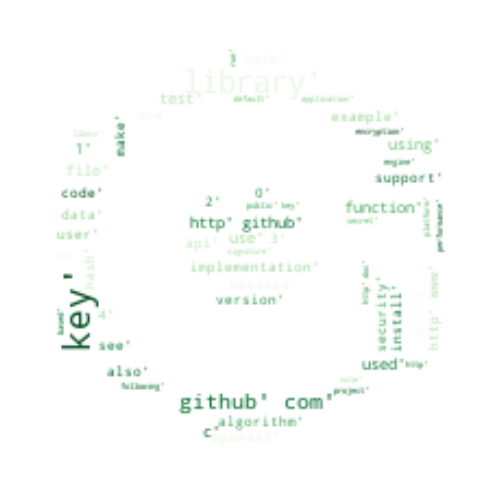

In [116]:
word_cloud('C', 'images/c.png')

In [118]:
word_cloud('Python', 'images/p.jpg')

ValueError: could not broadcast input array from shape (900,) into shape (900,3)

In [164]:
new_df = pd.concat([pd.Series(new_lang, name='programming_language_99'),pd.Series(new_lemm, name='lemm')], axis=1)



In [165]:
new_df

programming_language_99                                               lemm
0                   Python  pyca cryptography image http img shield io pyp...
2                      C++  botan crypto tl modern c botan japanese peony ...
3                       Go  go cryptography go reference http pkg go dev b...
4                   Python  warning pycrypto 2 x unmaintained obsolete con...
5                      C++  crypto free c class library cryptographic sche...
..                     ...                                                ...
0                      PHP  '-' '-2a '-blowfish '-ciphertext '-classloader...
0                       C#  'api-generation' 'argon2-'s 'blake2b-pedigree'...
0                     HTML  '724b092810ec86d7e35c9d067702b31ef90bc43a7b598...
0         Jupyter Notebook  '-' '-100 '-100000 '-build '-extra '-n' '-open...
0                 Assembly  '-firefox 'kaby-lake 's-api 's-benchmark 's-co...

[423 rows x 2 columns]

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(new_df.lemm.values)
tfidfs

<423x20784 sparse matrix of type '<class 'numpy.float64'>'
	with 141165 stored elements in Compressed Sparse Row format>

In [168]:
tfidf_df = pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

encoded_df = pd.concat([tfidf_df, new_df.programming_language_99.reset_index()], axis=1)

encoded_df

00       000      0000  000000  00000000  \
0    0.000000  0.000000  0.000000     0.0       0.0   
1    0.000000  0.000000  0.000000     0.0       0.0   
2    0.000000  0.000000  0.000000     0.0       0.0   
3    0.000000  0.000000  0.000000     0.0       0.0   
4    0.000000  0.000000  0.000000     0.0       0.0   
..        ...       ...       ...     ...       ...   
418  0.010672  0.000000  0.000000     0.0       0.0   
419  0.000000  0.000000  0.000000     0.0       0.0   
420  0.000000  0.004293  0.005118     0.0       0.0   
421  0.000000  0.007836  0.000000     0.0       0.0   
422  0.015617  0.000000  0.000000     0.0       0.0   

     0000000000000000000000000000000000000000000000000000000000000000  \
0                                             0.000000                  
1                                             0.000000                  
2                                             0.000000                  
3                                             0.000000                  
4                                             0.000000                  
..                                                 ...                  
418                                           0.000000                  
419                                           0.007855                  
420                                           0.000000                  
421                                           0.000000                  
422                                           0.000000                  

     0000000000000000000000000000000000000000000000000000000000000001  \
0                                                  0.0                  
1                                                  0.0                  
2                                                  0.0                  
3                                                  0.0                  
4                                                  0.0                  
..                                                 ...                  
418                                                0.0                  
419                                                0.0                  
420                                                0.0                  
421                                                0.0                  
422                                                0.0                  

     00000000000000000000000000000011  00000000000000000000000000001111  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3                                 0.0                               0.0   
4                                 0.0                               0.0   
..                                ...                               ...   
418                               0.0                               0.0   
419                               0.0                               0.0   
420                               0.0                               0.0   
421                               0.0                               0.0   
422                               0.0                               0.0   

     00000010  ...   zx  zxa  zxfw  zymbit  zymkey  zypper   zz  zz59mmox75d  \
0         0.0  ...  0.0  0.0   0.0     0.0     0.0     0.0  0.0     0.000000   
1         0.0  ...  0.0  0.0   0.0     0.0     0.0     0.0  0.0     0.000000   
2         0.0  ...  0.0  0.0   0.0     0.0     0.0     0.0  0.0     0.000000   
3         0.0  ...  0.0  0.0   0.0     0.0     0.0     0.0  0.0     0.000000   
4         0.0  ...  0.0  0.0   0.0     0.0     0.0     0.0  0.0     0.000000   
..        ...  ...  ...  ...   ...     ...     ...     ...  ...          ...   
418       0.0  ...  0.0  0.0   0.0     0.0     0.0     0.0  0.0     0.010936   
419       0.0  ...  0.0  0.0   0.0     0.0     0.0     

In [177]:
tfidfs

<407x363258 sparse matrix of type '<class 'numpy.float64'>'
	with 489420 stored elements in Compressed Sparse Row format>

In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


knn = KNeighborsClassifier(n_neighbors=9)

x_train, y_train, x_validate, y_validate, x_test, y_test = md.xy_train_validate_test(train, validate, test, 'programming_language_99')
knn.fit(x_train, y_train)

train_actual = y_train
validate_actual = y_validate
test_actual = y_test

train_prediction = knn.predict(x_train)
validate_prediction = knn.predict(x_validate)
test_prediction = knn.predict(x_test)

print(f'Train Accuracy: {accuracy_score(train_actual, train_prediction)}')
print(f'Validate Accuracy: {accuracy_score(validate_actual, validate_prediction)}')
print(f'Test Accuracy: {accuracy_score(test_actual, test_prediction)}')




Train Accuracy: 0.5814977973568282
Validate Accuracy: 0.5306122448979592
Test Accuracy: 0.4878048780487805


In [187]:
python = pd.Series(" ".join(lang_dict["Python"].lemm).split(" "), name='python')
python.head()

0            pyca
1    cryptography
2           image
3            http
4             img
Name: python, dtype: object

In [188]:
python.value_counts().head(20)

http            927
key             649
com             609
github          444
0               430
attack          362
python          334
li              324
ul              324
master          323
cryptography    323
x               313
1               307
py              306
encryption      247
message         234
file            222
2               218
blob            196
image           186
Name: python, dtype: int64

In [190]:
java = pd.Series(" ".join(lang_dict["Java"].lemm).split(" "), name='java')
java.value_counts().head(20)


http            273
java            232
com             200
cryptography    197
key             141
github          123
src             116
test             97
master           82
blob             75
norkator         73
see              69
org              67
encryption       67
hash             67
aes              65
1                64
cipher           58
2                54
file             53
Name: java, dtype: int64

In [189]:
cplusplus = pd.Series(" ".join(lang_dict["C++"].lemm).split(" "), name='C++')
cplusplus.value_counts().head(20)



http         723
com          502
github       411
build        379
0            236
library      220
use          213
key          202
1            194
install      188
seal         184
c            183
cmake        179
org          176
project      160
make         159
microsoft    153
test         150
example      148
crypto       142
Name: C++, dtype: int64

In [192]:
freq_df.sort_values(by='total', ascending=False).head(20)

Python  C++   Go    C  Haskell  JavaScript  TeX  Rust  \
http             926  723  504  731       73         623   62   843   
com              607  502  429  422       42         299   32   242   
key              649  202  135  665        1         284    4   149   
github           444  411  254  250       42         237   29   237   
0                430  236  266  186       12          81   15   162   
1                307  193  127  246        4         124   13   227   
org              162  176  182  203       21         201   20   155   
use              156  213   55  250       12         102   15   190   
build            177  379   38  227       18          56    3   142   
2                218  136   73  174       12          61    8   267   
cryptography     313   54   18  119        5          74   37    52   
test             148  150   53  355       14          86    0    91   
crypto            62  141   54  295       16         155    7    77   
library           73  219   54  297       18          87    2   133   
hash             163   35   12  197        1         154    3   115   
function         144   56    7  222        3         111    5    46   
using            176  137   56  199        7          52    4    75   
io               123   82   71   85        8          57    4   314   
file             222  118   38  237       13          97    2    33   
example          149  148   35  201        8          91    2   151   

              TypeScript  Java  Swift  PHP   C#  HTML  Jupyter Notebook  \
http                  94   273    216  129  278   571               109   
com                   56   198    126   66  151    88                67   
key                   17   140    173   66   77   336                33   
github                27   123     94   44   89    95                39   
0                     10    48     33   64   59    32                24   
1                     16    64     35   42   44    82                47   
org                   23    67     58   50   51    37                15   
use                   19    35     45   52   44    49                32   
build                  9    25     18    7   35     8                21   
2                      9    54     37   27   21    47                 8   
cryptography          65   194     45    7  115    25                31   
test                   6    97      4    9    9    39                22   
crypto                17    34     12   15   13   129                31   
library                8    46     19   23   35    21                 9   
hash                  12    67     39   34   61    60                 2   
function              42    13     26   17   25   219                 2   
using                 22    46     59   26   52    16                18   
io                    10    25     41   16   53    22                13   
file                  12    52     16   17   15    31                13   
example                8    36      9   28    7    30                 6   

              Assembly       idf   total  
http               117  1.127424  6272.0  
com                 80  1.094086  3407.0  
key                 19  1.746781  2950.0  
github              75  1.413194  2490.0  
0                   26  1.225904  1684.0  
1                   46  1.172911  1617.0  
org                 23  1.393836  1444.0  
use                 25  1.334426  1294.0  
build               27  1.928910  1190.0  
2                   23  1.186589  1175.0  
cryptography         8  1.800885  1162.0  
test                48  1.695833  1131.0  
crypto               3  1.159544  1061.0  
library             16  1.884259  1060.0  
hash                40  2.949275   995.0  
function            18  2.481707   956.0  
using                8  1.761905   953.0  
io                  15  1.057143   939.0  
file                14  1.995098   930.0  
example             12  2.211957   921.0

In [199]:
stop_words = ['0', '1', '2', 'http', 'com', 'org', 'github']

In [200]:
df2 = freq_df.drop(index=stop_words)
df2.head(20)

Python  C++  Go   C  \
                                                         0    0   0   0   
'                                                       60    9  10  50   
''                                                       1    2   0   0   
'0'                                                      0    1   0   0   
'000102030405060708090a0b0c0d0e0f'                       0    0   0   0   
'004f70656e54696d657374616d7073000050726f6f6600...       0    0   0   0   
'004f70656e54696d657374616d7073000050726f6f6600...       0    0   0   0   
'01020304'                                               0    0   0   1   
'02208b                                                  0    0   0   0   
'02208b'                                                 0    0   0   0   
'022799c0d0ee09772fdd337d4f28dc155581951d07082f...       1    0   0   0   
'03c00100800280a6386fa1781a92e3905f718d4e0ea0d7...       0    0   0   1   
'04                                                      0    0   0   0   
'04'                                                     0    0   0   0   
'05c4f616a8e5310d19d938cfd769864d7f4ccdc2ca8b47...       0    0   0   0   
'05c4f616a8e5310d19d938cfd769864d7f4ccdc2ca8b47...       0    0   0   0   
'0a1af638                                                0    0   0   0   
'0b99b82f                                                0    0   0   0   
'0x'                                                     0    1   0   0   
'0x18'                                                   1    0   0   0   

                                                    Haskell  JavaScript  TeX  \
                                                          0           0    0   
'                                                         0          50    1   
''                                                        0           7    0   
'0'                                                       0           0    0   
'000102030405060708090a0b0c0d0e0f'                        0           2    0   
'004f70656e54696d657374616d7073000050726f6f6600...        0           2    0   
'004f70656e54696d657374616d7073000050726f6f6600...        0           1    0   
'01020304'                                                0           0    0   
'02208b                                                   0           1    0   
'02208b'                                                  0           1    0   
'022799c0d0ee09772fdd337d4f28dc155581951d07082f...        0           0    0   
'03c00100800280a6386fa1781a92e3905f718d4e0ea0d7...        0           0    0   
'04                                                       0           0    0   
'04'                                                      0           1    0   
'05c4f616a8e5310d19d938cfd769864d7f4ccdc2ca8b47...        0           1    0   
'05c4f616a8e5310d19d938cfd769864d7f4ccdc2ca8b47...        0           2    0   
'0a1af638                                                 0           1    0   
'0b99b82f                                                 0           2    0   
'0x'                                                      0           0    0   
'0x18'                                                    0           0    0   

                                                    Rust  TypeScript  Java  \
                                                       0           0     0   
'                                                      1           1     4   
''                                                     0           0     0   
'0'                                                    0           0     0   
'000102030405060708090a0b0c0d0e0f'                     0           0     0   
'004f70656e54696d657374616d7073000050726f6f6600...     0           0     0   
'004f70656e54696d657374616d7073000050726f6f6600...     0           0     0   
'01020304'                                             0           0     0   
'02208b                                                0           0     0   
'02208b'       

In [202]:
df2.sort_values(by='total', ascending=False).head(20)

Python  C++   Go    C  Haskell  JavaScript  TeX  Rust  \
key              649  202  135  665        1         284    4   149   
use              156  213   55  250       12         102   15   190   
build            177  379   38  227       18          56    3   142   
cryptography     313   54   18  119        5          74   37    52   
test             148  150   53  355       14          86    0    91   
crypto            62  141   54  295       16         155    7    77   
library           73  219   54  297       18          87    2   133   
hash             163   35   12  197        1         154    3   115   
function         144   56    7  222        3         111    5    46   
using            176  137   56  199        7          52    4    75   
io               123   82   71   85        8          57    4   314   
file             222  118   38  237       13          97    2    33   
example          149  148   35  201        8          91    2   151   
master           323  101   54   80        8          50   21    64   
code             184  123   57  210        3          83    2    76   
message          234    9   47  211        2         126    1    72   
aes               61  109   32  126        0          63    1    38   
data             107  111   37  155        1          62    2    46   
doc               50   67   61  166        7          67    0   281   
html              31   52   16   70        1          78    5    60   

              TypeScript  Java  Swift  PHP   C#  HTML  Jupyter Notebook  \
key                   17   140    173   66   77   336                33   
use                   19    35     45   52   44    49                32   
build                  9    25     18    7   35     8                21   
cryptography          65   194     45    7  115    25                31   
test                   6    97      4    9    9    39                22   
crypto                17    34     12   15   13   129                31   
library                8    46     19   23   35    21                 9   
hash                  12    67     39   34   61    60                 2   
function              42    13     26   17   25   219                 2   
using                 22    46     59   26   52    16                18   
io                    10    25     41   16   53    22                13   
file                  12    52     16   17   15    31                13   
example                8    36      9   28    7    30                 6   
master                 8    82     17   29   32    12                27   
code                   8    36     22   10   23    26                29   
message                8    24     49   29   29    13                 4   
aes                   18    65    101    4    2   233                 3   
data                   7    19     75    6   86   111                 9   
doc                   10    18      6   40   21     8                 7   
html                   5    13     25    1   17   419                 1   

              Assembly       idf   total  
key                 19  1.746781  2950.0  
use                 25  1.334426  1294.0  
build               27  1.928910  1190.0  
cryptography         8  1.800885  1162.0  
test                48  1.695833  1131.0  
crypto               3  1.159544  1061.0  
library             16  1.884259  1060.0  
hash                40  2.949275   995.0  
function            18  2.481707   956.0  
using                8  1.761905   953.0  
io                  15  1.057143   939.0  
file                14  1.995098   930.0  
example             12  2.211957   921.0  
master              11  2.224044   919.0  
code                22  1.553435   914.0  
message              3  3.391667   861.0  
aes                  0  4.239583   856.0  
data                 1  2.437126   835.0  
doc                  7  1.808889   816.0  
html                 7  2.806897   801.0

In [203]:
top_10 = ['key', 'use', 'using', 'build', 'cryptography', 'test', 'crypto',
         'hash', 'library', 'function', 'io']

In [204]:
df2.total.sum()

258278.0

In [208]:
df2[df2.index in top_10].sum()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [215]:
top_10 = ['^' + top + '$' for top in top_10]
regex = "|".join(top_10)
df2[df2.index.str.contains(regex)]

Python  C++   Go    C  Haskell  JavaScript  TeX  Rust  \
build            177  379   38  227       18          56    3   142   
crypto            62  141   54  295       16         155    7    77   
cryptography     313   54   18  119        5          74   37    52   
function         144   56    7  222        3         111    5    46   
hash             163   35   12  197        1         154    3   115   
io               123   82   71   85        8          57    4   314   
key              649  202  135  665        1         284    4   149   
library           73  219   54  297       18          87    2   133   
test             148  150   53  355       14          86    0    91   
use              156  213   55  250       12         102   15   190   
using            176  137   56  199        7          52    4    75   

              TypeScript  Java  Swift  PHP   C#  HTML  Jupyter Notebook  \
build                  9    25     18    7   35     8                21   
crypto                17    34     12   15   13   129                31   
cryptography          65   194     45    7  115    25                31   
function              42    13     26   17   25   219                 2   
hash                  12    67     39   34   61    60                 2   
io                    10    25     41   16   53    22                13   
key                   17   140    173   66   77   336                33   
library                8    46     19   23   35    21                 9   
test                   6    97      4    9    9    39                22   
use                   19    35     45   52   44    49                32   
using                 22    46     59   26   52    16                18   

              Assembly       idf   total  
build               27  1.928910  1190.0  
crypto               3  1.159544  1061.0  
cryptography         8  1.800885  1162.0  
function            18  2.481707   956.0  
hash                40  2.949275   995.0  
io                  15  1.057143   939.0  
key                 19  1.746781  2950.0  
library             16  1.884259  1060.0  
test                48  1.695833  1131.0  
use                 25  1.334426  1294.0  
using                8  1.761905   953.0

In [217]:
df2[df2.index.str.contains(regex)].total.sum() / df2.total.sum()

0.05300877349212864

In [218]:
df2.tail(30)

Python  C++  Go  C  Haskell  JavaScript  TeX  \
zooko                               0    0   0  1        0           0    0   
zookozcash                          0    0   0  0        0           0    0   
zoom                                0    0   0  0        0           0    1   
zozol                               0    0   0  0        0           1    0   
zpl                                 1    0   0  0        0           0    0   
zprv                                2    0   0  0        0           0    0   
zq                                  1    0   0  0        0           0    0   
zqjiggz009mnrawv                    1    0   0  0        0           0    0   
zqulbzdodujenpbpzhmmcm4             0    0   0  0        0           0    0   
zr                                  2    0   0  0        0           0    0   
zrk                                 0    0   0  0        0           0    0   
zshrc                               0    0   0  0        0           0    1   
zstandard                           0    9   0  0        0           0    0   
zstd                                0    2   0  0        0           0    0   
ztvclqt                             1    0   0  0        0           0    0   
zuc                                16    0   0  0        0           0    0   
zugyitiqtk8zfwexkbgcv2mzvmtbh       0    0   0  0        0           0    0   
zukerman                            0    1   0  0        0           0    0   
zulip                               0    0   0  0        0           0    0   
zulipchat                           0    0   0  0        0           0    0   
zuur                                4    0   0  0        0           0    0   
zvqczfzr124                         0    0   0  0        0           3    0   
zx                                  1    0   0  0        0           0    0   
zxa                                 1    0   0  0        0           0    0   
zxfw                                0    0   0  0        0           1    0   
zymbit                              0    0   0  1        0           0    0   
zymkey                              0    0   0  1        0           0    0   
zypper                              0    2   0  0        0           0    0   
zz                                  0    5   0  0        0           0    0   
zz59mmox75d                         0    0   0  0        0           0    0   

                               Rust  TypeScript  Java  Swift  PHP  C#  HTML  \
zooko                             0           0     0      0    0   0     0   
zookozcash                        0           0     0      0    0   0     0   
zoom                              1           0     0      0    0   0     0   
zozol                             0           0     0      0    0   0     0   
zpl                               0           0     0      0    0   0     0   
zprv                              0           0     0      0    0   0     0   
zq                                0           0     0      0    0   0     0   
zqjiggz009mnrawv                  0           0     0      0    0   0     0   
zqulbzdodujenpbpzhmmcm4           0           0     0      0    1   0     0   
zr                                0           0     0      0    0   0     0   
zrk                               0           0     0      0    1   0     0   
zshrc                             0           0     0      0    0   0     0   
zstandard                         0           0     0      0    0   0     0   
zstd                              0           0     0      0    0   0     0   
ztvclqt                           0           0     0      0    0   0     0   
zuc                               1           0     0      0    0   0     0   
zugyitiqtk8zfwexkbgcv2mzvmtbh     0           0     0      0    1   0     0   
zukerman                          0           0     0      0    0   0     0   
zulip                             7           0     0      0    0   0     6   
z

In [219]:
freq_df.index.unique()

Index(['', ''', '''', ''0'', ''000102030405060708090a0b0c0d0e0f'',
       ''004f70656e54696d657374616d7073000050726f6f6600bf89e2e884e89294010805c4f616a8e5310d19d938cfd769864d7f4ccdc2ca8b479b10af83564b097af9f010e754bf93806a7ebaa680ef7bd0114bf408f010b573e8850cfd9e63d1f043fbb6fc250e08f10457cfa5c4f0086fb1ac8d4e4eb0e70083dfe30d2ef90c8e2e2d68747470733a2f2f616c6963652e6274632e63616c656e6461722e6f70656e74696d657374616d70732e6f7267'',
       ''004f70656e54696d657374616d7073000050726f6f6600bf89e2e884e89294010832bb24ab386bef01c0656944ecafa2dbb1e4162ced385754419467f9fb6f4d97f010c7c118043ce37d45f1ab81d3cd9dc9aa08fff0109b01031328e457c754a860bc5bc567ab08f02012dbcf25d46d7f01c4bd7c7ebdcd2080974b83a9198bc63cdb23f69c817f110508f0203c6274f7a67007de279fb68938e5549f462043570ccdbc17ba43e632a772d43208f1045ab0daf9f008ad9722b721af69e80083dfe30d2ef90c8e292868747470733a2f2f66696e6e65792e63616c656e6461722e657465726e69747977616c6c2e636f6df010dfd289ba718b4f30bb78191936c762a508f02026503e60c641473ec6f833953d04f7c8a65c5

In [224]:
" ".join(df.lemm.astype(str))

"pyca cryptography image http img shield io pypi v cryptography svg target http pypi org project cryptography alt latest version image http readthedocs org project cryptography badge version latest target http cryptography io alt latest doc image http com pyca cryptography workflow ci badge svg branch main target http com pyca cryptography action query workflow 3aci branch 3amain cryptography package provides cryptographic recipe primitive python developer goal cryptographic standard library support python 3 6 pypy3 7 2 cryptography includes high level recipe low level interface common cryptographic algorithm symmetric cipher message digest key derivation function example encrypt something cryptography 's high level symmetric encryption recipe block pycon cryptography fernet import fernet put somewhere safe key fernet generate key f fernet key token f encrypt b really secret message prying eye token ' ' f decrypt token 'a really secret message prying eye ' find information documentatio

In [256]:
bigrams = list(nltk.ngrams(" ".join(df.lemm.astype(str)).split(), 2))
pd.Series(bigrams).value_counts().head(20)

(http, com)          2579
(http, img)           829
(img, shield)         827
(shield, io)          827
(http, www)           496
(blob, master)        496
(nist, gov)           439
(public, key)         387
(acvp, draft)         387
(gov, acvp)           381
(page, nist)          380
(http, page)          380
(svg, http)           311
(http, doc)           282
(elliptic, curve)     271
(0, 0)                249
(td, td)              245
(private, key)        243
(svg, style)          217
(org, wiki)           198
dtype: int64

In [ ]:
for ind in list(tri_grams.index):
    if 'wikipedia' in " ".join(ind):
        print(ind)

In [226]:
trigrams = list(nltk.ngrams(" ".join(df.lemm.astype(str)).split(), 3))

In [254]:
tri_grams = pd.Series(trigrams).value_counts().sort_values(ascending=False)
for ind in list(tri_grams.index):
    if 'wikipedia' in " ".join(ind):
        print(ind)

('wikipedia', 'org', 'wiki')
('en', 'wikipedia', 'org')
('http', 'en', 'wikipedia')
('pseudocode', 'wikipedia', 'http')
('wikipedia', 'http', 'en')
('wikipedia', 'pseudocode', 'http')
('top', 'wikipedia', 'pseudocode')
('wikimedia', 'org', 'wikipedia')
('org', 'wikipedia', 'common')
('fr', 'wikipedia', 'org')
('http', 'fr', 'wikipedia')
('function', 'en', 'wikipedia')
('cfb', 'en', 'wikipedia')
('ofb', 'en', 'wikipedia')
('pcbc', 'en', 'wikipedia')
('crc32', 'en', 'wikipedia')
('ecb', 'en', 'wikipedia')
('crc16', 'en', 'wikipedia')
('cbc', 'en', 'wikipedia')
('crc32c', 'en', 'wikipedia')
('md', 'cjdns', 'wikipedia')
('cjdns', 'wikipedia', 'advanced')
('wikipedia', 'advanced', 'configuration')
('wikipedia', 'common', '1')
('waterfall', 'cjdns', 'wikipedia')
('wikipedia', 'http', 'fr')
('cjdns', 'wikipedia', 'http')
('sanitizer', 'en', 'wikipedia')
('image', 'check', 'wikipedia')
('wikipedia', 'article', 'visual')
('check', 'wikipedia', 'article')
('cryptography', 'en', 'wikipedia')
('at

In [235]:
top_words = df2.sort_values(by='total', ascending=False).head(11).total

In [241]:
top_words = pd.DataFrame(top_words)
top_words.head()

total
key           2950.0
use           1294.0
build         1190.0
cryptography  1162.0
test          1131.0

ValueError: '#82c7a5' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

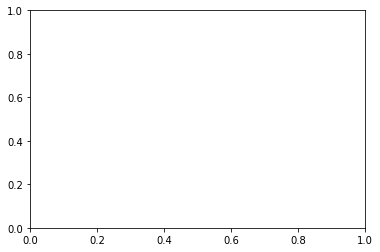

In [279]:
top_words.plot(kind='bar', colormap='#82c7a5')
plt.title('Top 10 Occurring Words')
plt.tick_params(axis='x', colors='#82c7a5')
plt.tick_params(axis='y', colors='#82c7a5')

plt.savefig('top_10_words.png', transparent=True)
